In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
train_path = './data/Train_Dataset.csv'
test_path = './data/Test_Dataset.csv'
cleaned_train_path = './data/Cleaned_Train_Dataset.csv'
cleaned_test_path = './data/Cleaned_Test_Dataset.csv'

In [3]:
train_df = pd.read_csv(train_path)
print(train_df.shape)
train_df.head()

(2321, 21)


,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,Unnamed: 20
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,...,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No,NaN
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,...,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No,NaN
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,...,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No,NaN
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,...,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No,NaN
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,...,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No,NaN


In [4]:
test_df = pd.read_csv(test_path)
print(test_df.shape)
test_df.head()

(1500, 21)


,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Unnamed: 19,Unnamed: 20
0,3322,91,445.0,yes,no,0.0,258.4,112.0,42.89,190.0,...,14.47,158.6,105.0,7.09,12.1,3.0,3.27,2.0,NaN,NaN
1,3323,113,445.0,no,yes,20.0,155.8,81.0,28.83,168.5,...,13.73,275.5,105.0,12.22,8.7,3.0,2.35,5.0,NaN,NaN
2,3324,122,445.0,no,no,0.0,237.2,137.0,40.30,263.8,...,22.76,251.3,105.0,10.81,8.8,4.0,2.38,1.0,NaN,NaN
3,3325,103,445.0,no,no,0.0,133.6,117.0,23.60,156.1,...,13.37,207.2,105.0,9.95,10.4,7.0,2.81,8.0,NaN,NaN
4,3326,111,452.0,no,no,0.0,115.6,120.0,24.54,211.1,...,18.79,140.9,105.0,5.76,12.7,1.0,3.43,4.0,NaN,NaN


### Train Dataframe

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2321 non-null   int64  
 1   account_length          2319 non-null   float64
 2   location_code           2321 non-null   int64  
 3   intertiol_plan          2318 non-null   object 
 4   voice_mail_plan         2315 non-null   object 
 5   number_vm_messages      2318 non-null   float64
 6   total_day_min           2320 non-null   float64
 7   total_day_calls         2318 non-null   float64
 8   total_day_charge        2316 non-null   float64
 9   total_eve_min           2318 non-null   float64
 10  total_eve_calls         2317 non-null   float64
 11  total_eve_charge        2313 non-null   float64
 12  total_night_minutes     2319 non-null   float64
 13  total_night_calls       2316 non-null   float64
 14  total_night_charge      2316 non-null   

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,2321.0,2161.000000,670.159309,1001.00,1581.000,2161.00,2741.0000,3321.00
account_length,2319.0,101.400172,40.044985,1.00,74.000,101.00,127.0000,232.00
location_code,2321.0,473.470918,42.011853,445.00,445.000,452.00,452.0000,547.00
number_vm_messages,2318.0,7.557377,14.250001,-202.00,0.000,0.00,14.0000,51.00
total_day_min,2320.0,182.718103,73.332822,-179.90,144.000,180.35,221.0000,2283.90
total_day_calls,2318.0,105.324418,221.100535,-1.00,87.000,102.00,115.0000,10700.00
total_day_charge,2316.0,30.961524,9.830271,-25.60,24.480,30.60,37.5900,60.96
total_eve_min,2318.0,203.511734,115.552100,-103.30,165.925,202.40,236.4000,5186.40
total_eve_calls,2317.0,100.125162,20.536224,-80.00,87.000,101.00,114.0000,170.00
total_eve_charge,2313.0,17.123130,4.327327,0.00,14.180,17.21,20.0900,30.83


### <u>Data Cleaning</u>

### Deteact & Remove Duplicates

In [7]:
train_df.drop(columns=['customer_id']).duplicated().value_counts()

False    2317
True        4
dtype: int64

In [8]:
duplicated = train_df.drop(columns=['customer_id']).duplicated()
duplicated.loc[duplicated == True].index

Int64Index([772, 807, 1704, 2295], dtype='int64')

In [9]:
d_droped_train = train_df.drop_duplicates(train_df.columns.drop(['customer_id']))
d_droped_train.shape

(2317, 21)

### Handling Missing Values & Out of Range Values

In [10]:
d_droped_train.isnull().sum()

customer_id                  0
account_length               2
location_code                0
intertiol_plan               3
voice_mail_plan              6
number_vm_messages           3
total_day_min                1
total_day_calls              3
total_day_charge             5
total_eve_min                3
total_eve_calls              4
total_eve_charge             8
total_night_minutes          2
total_night_calls            5
total_night_charge           5
total_intl_minutes           2
total_intl_calls             3
total_intl_charge            5
customer_service_calls       1
Churn                        5
Unnamed: 20               2317
dtype: int64

In [11]:
d_droped_train = d_droped_train.drop(columns=['Unnamed: 20'])

In [12]:
cols = d_droped_train.select_dtypes([np.number]).columns
d_droped_train[cols] = d_droped_train[cols].abs()

#### account_length

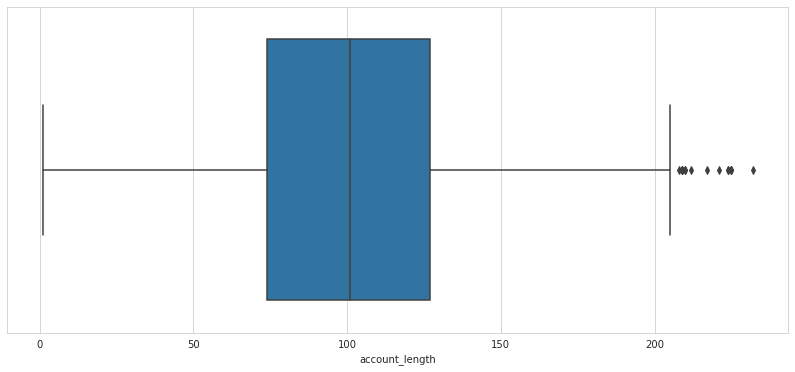

19.333333333333332


,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
728,1729,NaN,452,NaN,NaN,0.0,111.1,126.0,18.89,313.4,95.0,26.64,215.7,82.0,9.71,10.5,6.0,2.84,1.0,No
1273,2274,NaN,452,no,yes,35.0,208.3,128.0,33.54,127.1,93.0,11.99,220.1,91.0,9.54,10.1,3.0,2.73,2.0,Yes


In [13]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='account_length')
plt.show()
print(d_droped_train.account_length.max()/12)
d_droped_train[d_droped_train.account_length.isnull()]

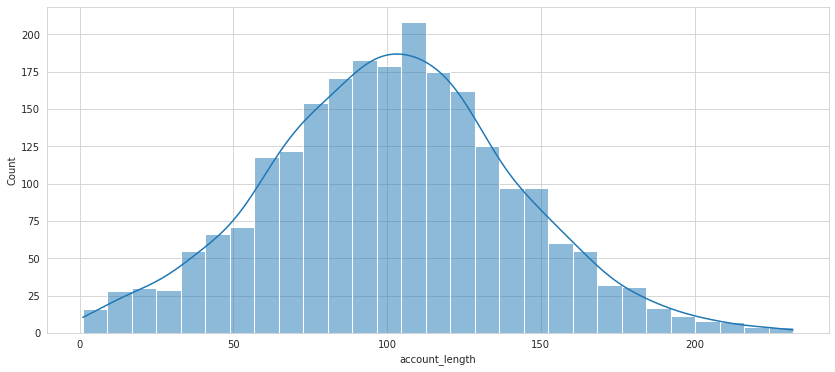

In [14]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='account_length', kde=True)
plt.show()

In [15]:
d_droped_train[(200 < d_droped_train.total_day_min) & (d_droped_train.total_day_min < 220)].account_length.describe()

count    259.000000
mean     104.042471
std       37.272230
min        7.000000
25%       80.500000
50%      106.000000
75%      130.000000
max      204.000000
Name: account_length, dtype: float64

In [16]:
d_droped_train['account_length'].fillna(d_droped_train.account_length.median(), inplace=True)

#### location_code

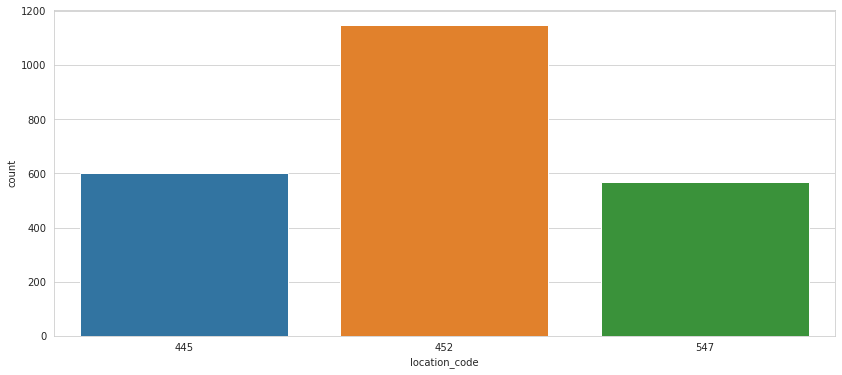

In [17]:
plt.figure(figsize=(14, 6))
sns.countplot(data=d_droped_train, x='location_code')
plt.show()

#### intertiol_plan

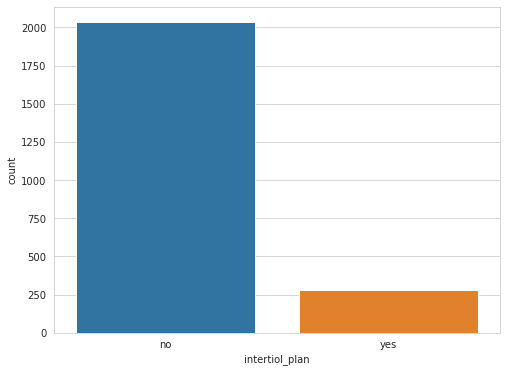

10.191387795275563
10.838928571428566 

728     6.0
1186    3.0
1328    3.0
Name: total_intl_calls, dtype: float64


In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=d_droped_train, x='intertiol_plan')
plt.show()
print(d_droped_train[d_droped_train.intertiol_plan == 'no'].total_intl_minutes.mean())
print(d_droped_train[d_droped_train.intertiol_plan == 'yes'].total_intl_minutes.mean(), '\n')
print(d_droped_train[d_droped_train.intertiol_plan.isnull()].total_intl_calls)

In [19]:
d_droped_train['intertiol_plan'].fillna('no', inplace=True)

#### voice_mail_plan

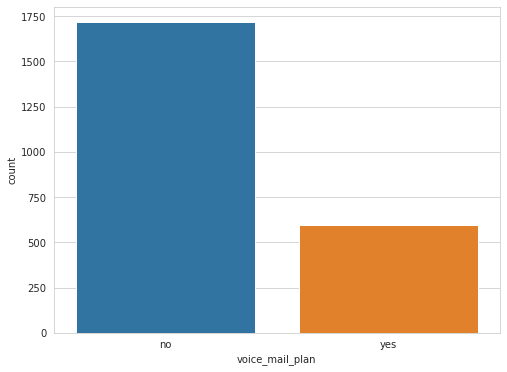

0.0      1714
202.0       1
Name: number_vm_messages, dtype: int64


,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
180,1181,24.0,445,no,NaN,NaN,151.0,70.0,25.33,126.0,87.0,11.14,224.6,67.0,NaN,8.6,2.0,2.32,2.0,Yes
728,1729,101.0,452,no,NaN,0.0,111.1,126.0,18.89,313.4,95.0,26.64,215.7,82.0,9.71,10.5,6.0,2.84,1.0,No
1109,2110,89.0,547,no,NaN,0.0,303.9,95.0,51.66,NaN,114.0,22.18,312.1,89.0,14.04,5.3,3.0,1.43,1.0,Yes
1407,2408,120.0,547,no,NaN,0.0,192.6,123.0,32.74,206.4,105.0,17.54,283.2,93.0,12.74,10.8,3.0,2.92,1.0,No
2090,3091,60.0,445,no,NaN,0.0,135.4,134.0,23.02,205.9,85.0,NaN,204.0,103.0,9.18,7.9,4.0,2.13,1.0,No
2200,3201,75.0,452,no,NaN,0.0,150.6,99.0,25.60,301.5,83.0,25.63,158.7,NaN,7.14,8.1,5.0,2.19,0.0,No


In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=d_droped_train, x='voice_mail_plan')
plt.show()
print(d_droped_train[d_droped_train.voice_mail_plan == 'no'].number_vm_messages.value_counts())
d_droped_train[d_droped_train.voice_mail_plan.isnull()]

In [21]:
d_droped_train['voice_mail_plan'].fillna('no', inplace=True)

#### number_vm_messages 	

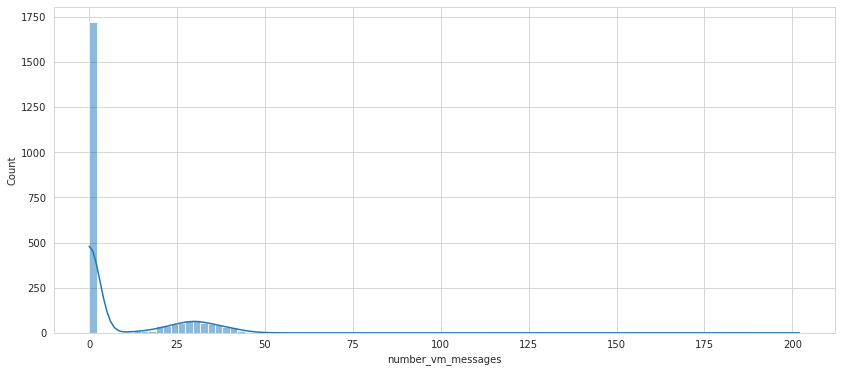

In [22]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='number_vm_messages', kde=True)
plt.show()

In [23]:
d_droped_train.loc[d_droped_train['number_vm_messages'].isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
180,1181,24.0,445,no,no,NaN,151.0,70.0,25.33,126.0,87.0,11.14,224.6,67.0,NaN,8.6,2.0,2.32,2.0,Yes
654,1655,106.0,452,no,no,NaN,187.1,104.0,31.81,250.2,117.0,NaN,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
1004,2005,133.0,445,no,yes,NaN,174.0,80.0,29.58,209.4,113.0,17.80,224.1,87.0,10.08,14.1,7.0,3.81,2.0,Yes


In [24]:
print(d_droped_train[d_droped_train.voice_mail_plan == 'no'].number_vm_messages.unique())
print(d_droped_train[d_droped_train.voice_mail_plan == 'yes'].number_vm_messages.min())

[  0.  nan 202.]
4.0


In [25]:
d_droped_train.loc[d_droped_train['voice_mail_plan'] == 'no', 'number_vm_messages'] = 0
d_droped_train.loc[(d_droped_train['voice_mail_plan'] == 'yes') & 
                   (d_droped_train['number_vm_messages'].isnull()), 'number_vm_messages'] = d_droped_train[d_droped_train.voice_mail_plan == 'yes'].number_vm_messages.median()

#### total_day_min

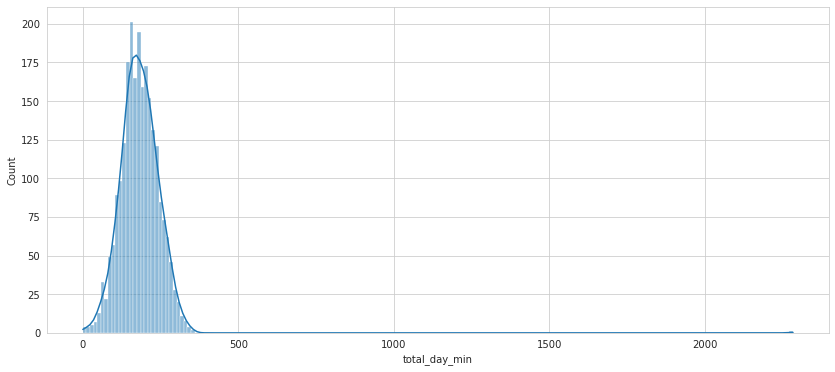

In [26]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_day_min', kde=True)
plt.show()

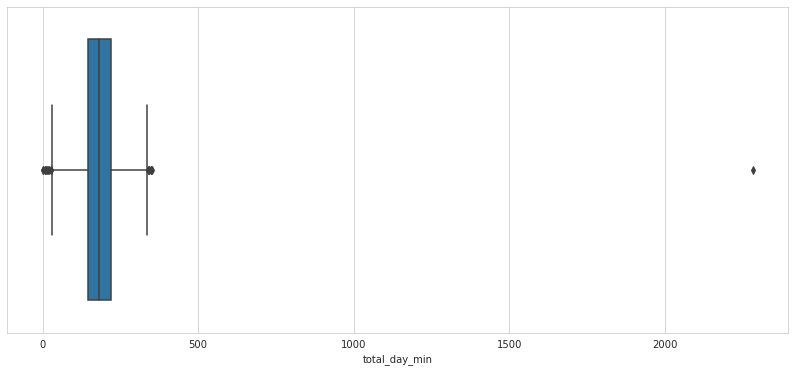

In [27]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_day_min')
plt.show()

In [28]:
d_droped_train[(d_droped_train.total_day_min > 350) | (d_droped_train.total_day_min <= 10)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
614,1615,134.0,452,no,no,0.0,7.8,86.0,1.33,171.4,100.0,14.57,186.5,80.0,8.39,12.9,2.0,3.48,2.0,No
851,1852,144.0,452,no,yes,51.0,2283.9,98.0,48.26,192.0,109.0,16.32,196.3,85.0,8.83,10.0,4.0,2.70,1.0,No
1054,2055,98.0,452,no,no,0.0,0.0,0.0,0.00,159.6,130.0,13.57,167.1,88.0,7.52,6.8,1.0,1.84,4.0,Yes
1124,2125,70.0,452,no,no,0.0,7.9,100.0,1.34,136.4,83.0,11.59,156.6,89.0,7.05,12.1,1.0,3.27,0.0,No
1543,2544,101.0,547,no,no,0.0,0.0,0.0,0.00,192.1,119.0,16.33,168.8,95.0,7.60,7.2,4.0,1.94,1.0,No
1854,2855,154.0,452,no,no,0.0,350.8,75.0,59.64,216.5,94.0,18.40,253.9,100.0,11.43,10.1,9.0,2.73,1.0,Yes


In [29]:
d_droped_train.loc[d_droped_train['total_day_min'] > 500, 'total_day_min'] = np.nan
d_droped_train[d_droped_train.total_day_min.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
851,1852,144.0,452,no,yes,51.0,NaN,98.0,48.26,192.0,109.0,16.32,196.3,85.0,8.83,10.0,4.0,2.70,1.0,No
1882,2883,126.0,452,no,no,0.0,NaN,102.0,38.88,168.7,99.0,NaN,223.5,100.0,10.06,11.8,4.0,3.19,1.0,No


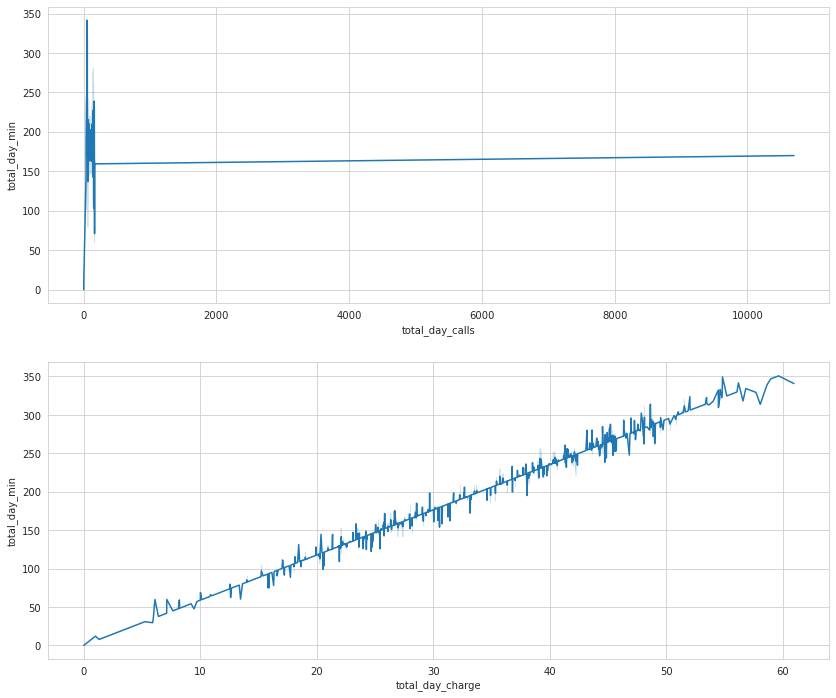

In [30]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_day_calls', y='total_day_min', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_day_charge', y='total_day_min', ax=axes[1])
plt.show()

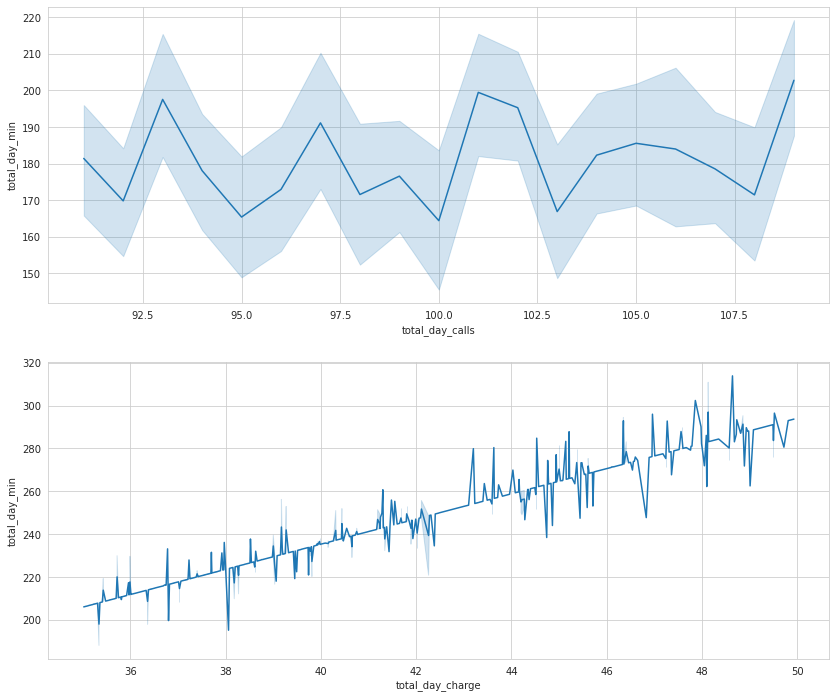

In [31]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train.loc[(d_droped_train.total_day_calls > 90) & 
                                     (d_droped_train.total_day_calls < 110)], x='total_day_calls', y='total_day_min', ax=axes[0])
sns.lineplot(data=d_droped_train.loc[(d_droped_train.total_day_charge > 35) & 
                                     (d_droped_train.total_day_charge < 50)], x='total_day_charge', y='total_day_min', ax=axes[1])
plt.show()

In [32]:
d_droped_train['total_day_min'] = d_droped_train.sort_values(['total_day_charge']).total_day_min.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_day_calls

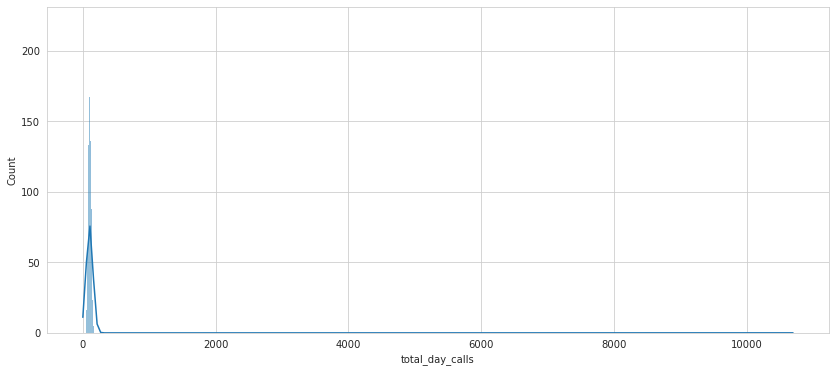

In [33]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_day_calls', kde=True)
plt.show()

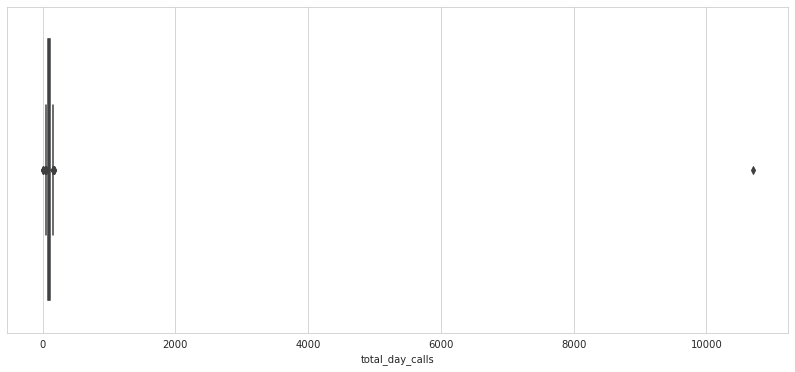

In [34]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_day_calls')
plt.show()

In [35]:
d_droped_train[(d_droped_train.total_day_calls > 350) | (d_droped_train.total_day_calls <= 10)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
567,1568,132.0,445,no,no,0.0,169.9,10700.0,28.88,209.4,121.0,17.80,206.1,79.0,9.27,11.5,2.0,3.11,1.0,No
1054,2055,98.0,452,no,no,0.0,0.0,0.0,0.00,159.6,130.0,13.57,167.1,88.0,7.52,6.8,1.0,1.84,4.0,Yes
1132,2133,98.0,452,no,no,0.0,12.0,1.0,1.00,157.6,126.0,12.57,155.1,89.0,7.52,6.8,2.0,1.84,4.0,Yes
1543,2544,101.0,547,no,no,0.0,0.0,0.0,0.00,192.1,119.0,16.33,168.8,95.0,7.60,7.2,4.0,1.94,1.0,No


In [36]:
d_droped_train.loc[d_droped_train['total_day_calls'] > 350, 'total_day_calls'] = np.nan
d_droped_train[d_droped_train.total_day_calls.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
567,1568,132.0,445,no,no,0.0,169.9,NaN,28.88,209.4,121.0,17.80,206.1,79.0,9.27,11.5,2.0,3.11,1.0,No
647,1648,160.0,452,no,no,0.0,256.0,NaN,43.52,187.4,61.0,15.93,NaN,81.0,5.36,11.5,4.0,3.11,3.0,No
1131,2132,111.0,547,no,no,0.0,179.9,NaN,29.07,106.8,58.0,9.74,209.7,89.0,9.62,10.5,NaN,NaN,4.0,Yes
1907,2908,164.0,547,no,no,0.0,192.1,NaN,32.66,249.8,94.0,21.23,132.6,100.0,5.97,7.3,3.0,1.97,3.0,No


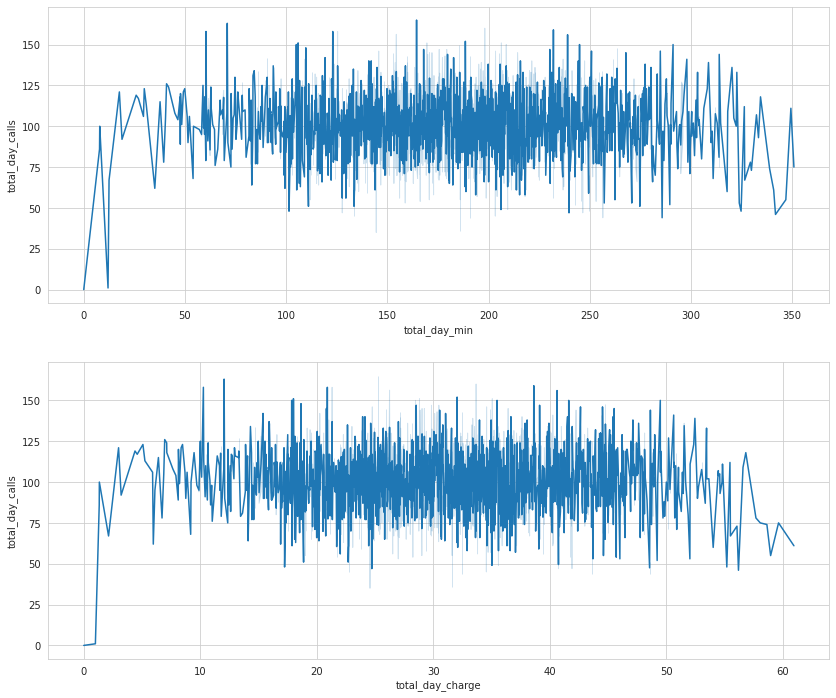

In [37]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_day_min', y='total_day_calls', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_day_charge', y='total_day_calls', ax=axes[1])
plt.show()

In [38]:
d_droped_train['total_day_calls'] = d_droped_train.sort_values(['total_day_min']).total_day_calls.ffill().sort_index()

#### total_day_charge

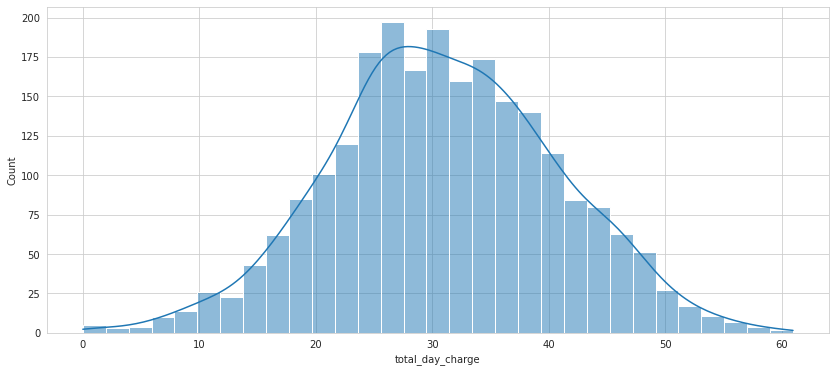

In [39]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_day_charge', kde=True)
plt.show()

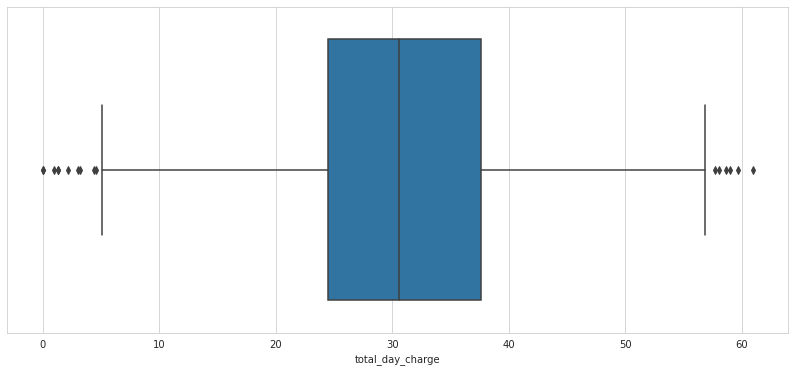

In [40]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_day_charge')
plt.show()

In [41]:
d_droped_train[d_droped_train.total_day_charge <= 5]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
130,1131,53.0,452,no,yes,27.0,25.9,119.0,4.40,206.5,96.0,17.55,228.1,64.0,10.26,6.5,7.0,1.76,1.0,No
346,1347,110.0,547,no,no,0.0,18.9,92.0,3.21,258.4,81.0,21.96,109.6,74.0,4.93,14.8,4.0,4.00,1.0,No
614,1615,134.0,452,no,no,0.0,7.8,86.0,1.33,171.4,100.0,14.57,186.5,80.0,8.39,12.9,2.0,3.48,2.0,No
709,1710,148.0,445,no,no,0.0,17.6,121.0,2.99,161.7,125.0,13.74,203.1,82.0,9.14,10.6,6.0,2.86,1.0,No
1049,2050,98.0,452,yes,no,0.0,12.5,67.0,2.13,256.6,90.0,21.81,169.4,88.0,7.62,7.7,9.0,2.08,1.0,No
1054,2055,98.0,452,no,no,0.0,0.0,0.0,0.00,159.6,130.0,13.57,167.1,88.0,7.52,6.8,1.0,1.84,4.0,Yes
1124,2125,70.0,452,no,no,0.0,7.9,100.0,1.34,136.4,83.0,11.59,156.6,89.0,7.05,12.1,1.0,3.27,0.0,No
1132,2133,98.0,452,no,no,0.0,12.0,1.0,1.00,157.6,126.0,12.57,155.1,89.0,7.52,6.8,2.0,1.84,4.0,Yes
1543,2544,101.0,547,no,no,0.0,0.0,0.0,0.00,192.1,119.0,16.33,168.8,95.0,7.60,7.2,4.0,1.94,1.0,No
1576,2577,43.0,452,no,no,0.0,27.0,117.0,4.59,160.9,97.0,13.68,279.5,96.0,12.58,10.7,3.0,2.89,3.0,No


In [42]:
d_droped_train[d_droped_train.total_day_charge.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
298,1299,106.0,445,no,yes,29.0,83.6,131.0,NaN,203.9,131.0,NaN,229.5,73.0,10.33,NaN,3.0,2.19,1.0,No
525,1526,85.0,452,no,no,0.0,236.9,93.0,NaN,197.7,113.0,16.80,309.1,78.0,13.91,11.4,7.0,3.08,2.0,Yes
1118,2119,120.0,445,yes,no,0.0,179.9,72.0,NaN,170.0,98.0,NaN,190.6,89.0,8.58,13.8,2.0,3.73,1.0,Yes
1767,2768,32.0,445,no,yes,26.0,266.7,109.0,NaN,232.3,107.0,19.75,212.8,98.0,9.58,16.3,4.0,4.40,1.0,No
1887,2888,122.0,445,no,no,0.0,231.2,141.0,NaN,267.8,136.0,22.76,240.3,NaN,10.81,8.8,5.0,2.38,1.0,Yes


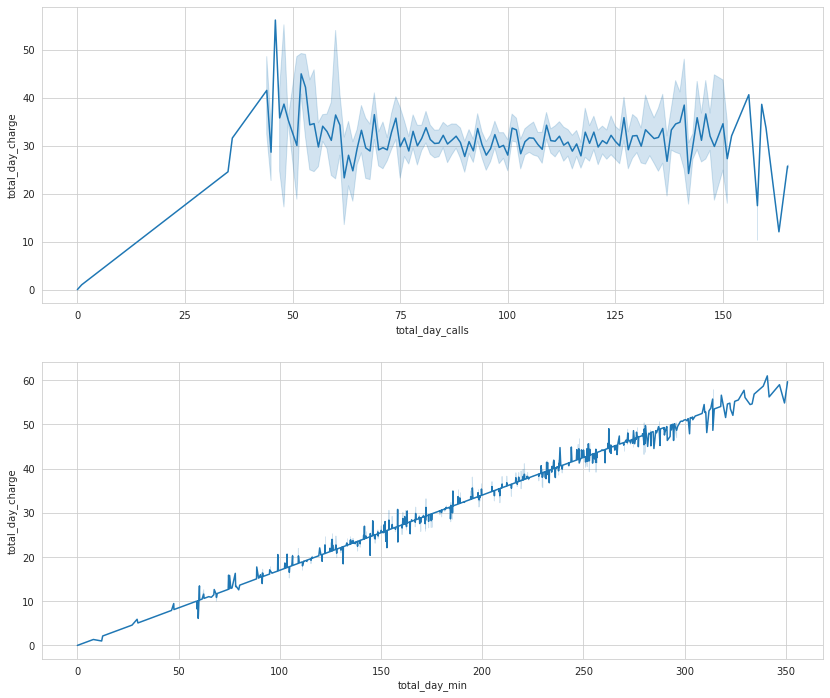

In [43]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_day_calls', y='total_day_charge', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_day_min', y='total_day_charge', ax=axes[1])
plt.show()

In [44]:
d_droped_train[(d_droped_train.total_day_calls > 70) & (d_droped_train.total_day_calls < 142)].total_day_charge.describe()

count    2098.000000
mean       30.969399
std         9.677276
min         1.330000
25%        24.480000
50%        30.600000
75%        37.615000
max        59.640000
Name: total_day_charge, dtype: float64

In [45]:
d_droped_train['total_day_charge'] = d_droped_train.sort_values(['total_day_min']).total_day_charge.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_eve_min

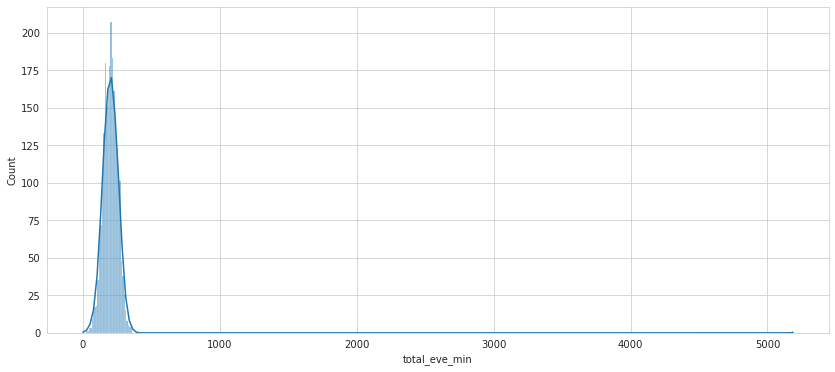

In [46]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_eve_min', kde=True)
plt.show()

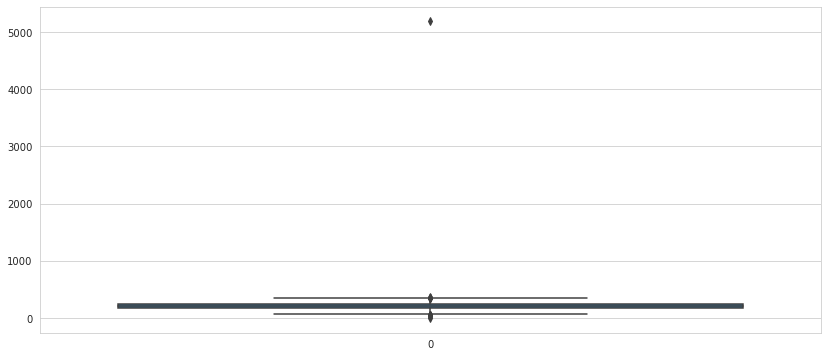

In [47]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train.total_eve_min)
plt.show()

In [48]:
d_droped_train[(d_droped_train.total_eve_min > 350) | (d_droped_train.total_eve_min <= 10)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
380,1381,101.0,452,no,yes,29.0,121.1,116.0,20.59,5186.4,100.0,15.84,241.7,75.0,10.88,10.1,6.0,2.73,0.0,No
996,1997,121.0,445,no,no,0.0,170.4,108.0,28.97,350.5,68.0,29.79,297.0,87.0,13.37,11.2,3.0,3.02,0.0,Yes
1156,2157,117.0,445,no,no,0.0,184.5,97.0,31.37,351.6,80.0,29.89,215.8,90.0,9.71,8.7,4.0,2.35,1.0,No
1274,2275,121.0,445,no,no,0.0,184.4,104.0,27.97,358.5,73.0,30.79,290.0,91.0,13.37,11.2,2.0,3.02,0.0,Yes
1353,2354,99.0,547,yes,no,0.0,242.3,102.0,41.19,350.9,102.0,29.83,163.1,93.0,7.34,11.3,3.0,3.05,0.0,Yes
1372,2373,102.0,452,no,no,0.0,129.5,56.0,22.02,354.2,118.0,30.11,145.5,93.0,6.55,10.9,3.0,2.94,1.0,No
1470,2471,97.0,452,no,no,0.0,209.2,134.0,35.56,0.0,0.0,0.00,175.4,94.0,7.89,11.8,6.0,3.19,1.0,No


In [49]:
d_droped_train.loc[d_droped_train['total_eve_min'] > 500, 'total_eve_min'] = np.nan
d_droped_train[d_droped_train.total_eve_min.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
380,1381,101.0,452,no,yes,29.0,121.1,116.0,20.59,NaN,100.0,15.84,241.7,75.0,10.88,10.1,6.0,2.73,0.0,No
492,1493,125.0,452,no,no,0.0,140.1,132.0,23.82,NaN,126.0,17.82,264.1,NaN,11.88,8.0,2.0,2.16,1.0,No
790,1791,112.0,452,no,no,0.0,120.9,98.0,19.02,NaN,139.0,10.69,143.8,83.0,6.61,14.1,4.0,3.81,5.0,Yes
1109,2110,89.0,547,no,no,0.0,303.9,95.0,51.66,NaN,114.0,22.18,312.1,89.0,14.04,5.3,3.0,1.43,1.0,Yes


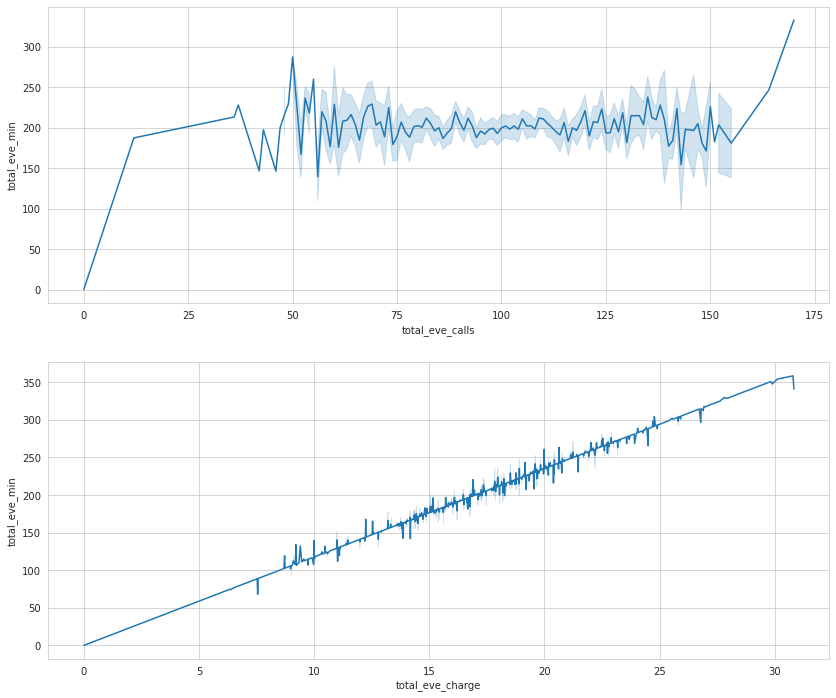

In [50]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_eve_calls', y='total_eve_min', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_eve_charge', y='total_eve_min', ax=axes[1])
plt.show()

In [51]:
d_droped_train['total_eve_min'] = d_droped_train.sort_values(['total_eve_charge']).total_eve_min.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_eve_calls

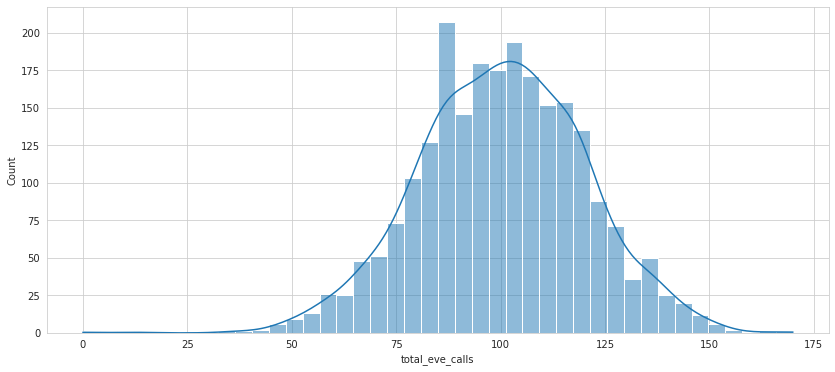

In [52]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_eve_calls', kde=True)
plt.show()

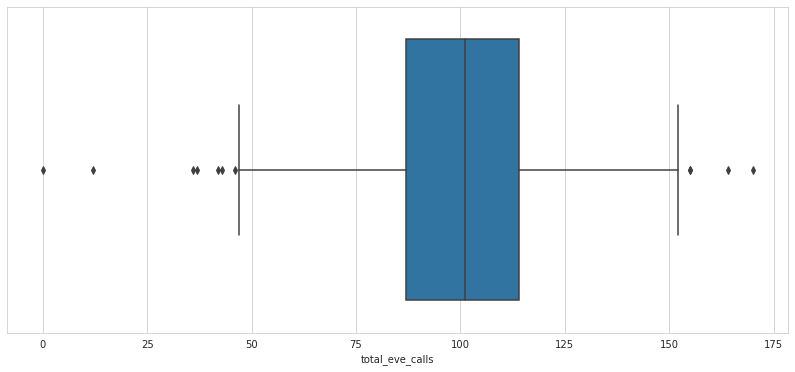

In [53]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_eve_calls')
plt.show()

In [54]:
d_droped_train[(d_droped_train.total_eve_calls > 160) | (d_droped_train.total_eve_calls <= 40)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
460,1461,74.0,445,no,no,0.0,157.1,95.0,26.71,213.1,36.0,18.11,280.4,77.0,12.62,7.6,3.0,2.05,2.0,No
848,1849,5.0,452,no,no,0.0,199.2,106.0,33.86,187.3,12.0,15.92,214.0,85.0,9.63,13.3,3.0,3.59,3.0,No
1470,2471,97.0,452,no,no,0.0,209.2,134.0,35.56,0.0,0.0,0.00,175.4,94.0,7.89,11.8,6.0,3.19,1.0,No
2126,3127,68.0,452,no,no,0.0,148.8,70.0,25.30,246.5,164.0,20.95,129.8,103.0,5.84,12.1,3.0,3.27,3.0,No
2130,3131,153.0,445,no,yes,28.0,235.6,74.0,40.05,227.9,37.0,19.37,170.3,103.0,7.66,15.4,9.0,4.16,0.0,No
2298,3299,150.0,452,no,yes,35.0,139.6,72.0,23.73,332.8,170.0,28.29,213.8,105.0,9.62,8.8,2.0,2.38,2.0,No


In [55]:
d_droped_train[d_droped_train.total_eve_calls.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
803,1804,87.0,452,no,no,0.0,240.0,83.0,40.80,134.1,NaN,11.40,189.1,84.0,8.51,9.3,2.0,2.51,0.0,Yes
1328,2329,76.0,452,no,no,0.0,171.1,78.0,29.09,257.2,NaN,21.86,91.6,92.0,4.12,16.2,3.0,4.37,1.0,No
1365,2366,98.0,547,yes,no,0.0,158.4,71.0,26.93,306.6,NaN,26.06,144.2,93.0,6.49,2.1,4.0,0.57,1.0,No
2037,3038,160.0,452,no,no,0.0,206.3,66.0,35.07,241.1,NaN,20.49,227.8,102.0,10.25,11.7,6.0,3.16,0.0,No


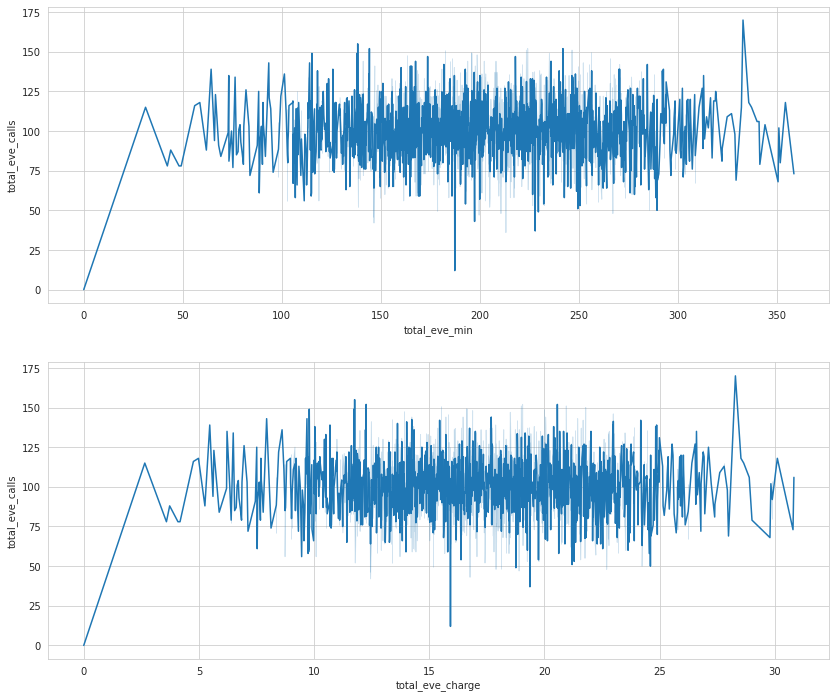

In [56]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_eve_min', y='total_eve_calls', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_eve_charge', y='total_eve_calls', ax=axes[1])
plt.show()

In [57]:
d_droped_train['total_eve_calls'] = d_droped_train.sort_values(['total_eve_min']).total_eve_calls.ffill().sort_index()

#### total_eve_charge

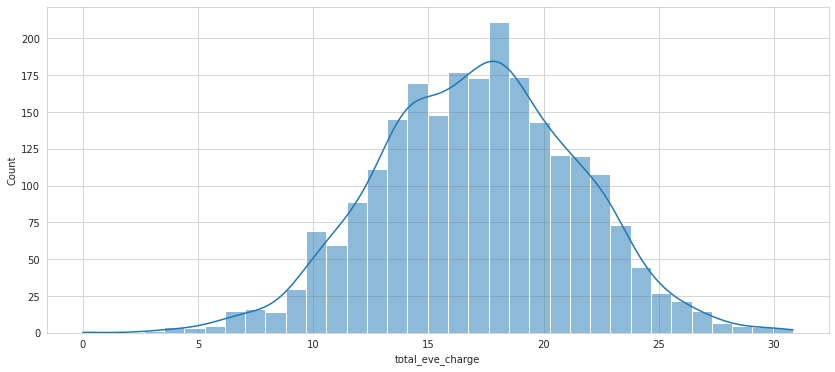

In [58]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_eve_charge', kde=True)
plt.show()

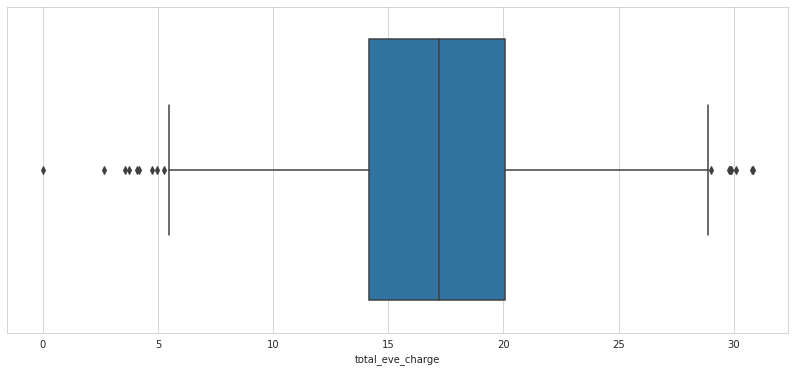

In [59]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_eve_charge')
plt.show()

In [60]:
d_droped_train[(d_droped_train.total_eve_charge > 30) | (d_droped_train.total_eve_charge < 5)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
512,1513,172.0,445,no,no,0.0,212.0,121.0,36.04,31.2,115.0,2.65,293.3,78.0,13.20,12.6,10.0,3.40,3.0,No
596,1597,48.0,547,no,no,0.0,128.2,71.0,21.79,48.1,78.0,4.09,116.3,80.0,5.23,8.9,3.0,2.40,0.0,No
976,1977,80.0,452,no,no,0.0,105.8,110.0,17.99,43.9,88.0,3.73,189.6,87.0,8.53,13.1,5.0,3.54,0.0,No
1274,2275,121.0,445,no,no,0.0,184.4,104.0,27.97,358.5,73.0,30.79,290.0,91.0,13.37,11.2,2.0,3.02,0.0,Yes
1372,2373,102.0,452,no,no,0.0,129.5,56.0,22.02,354.2,118.0,30.11,145.5,93.0,6.55,10.9,3.0,2.94,1.0,No
1399,2400,38.0,547,no,no,0.0,149.0,92.0,25.33,49.2,78.0,4.18,163.3,93.0,7.35,13.9,11.0,3.75,0.0,No
1470,2471,97.0,452,no,no,0.0,209.2,134.0,35.56,0.0,0.0,0.00,175.4,94.0,7.89,11.8,6.0,3.19,1.0,No
1695,2696,99.0,547,yes,no,0.0,234.3,98.0,39.19,340.9,106.0,30.83,163.1,97.0,7.34,11.3,3.0,3.05,0.0,Yes
1778,2779,50.0,445,no,no,0.0,183.6,107.0,31.21,58.6,118.0,4.98,202.6,99.0,9.12,8.7,3.0,2.35,1.0,No
2188,3189,149.0,452,no,no,0.0,156.0,56.0,26.52,56.0,116.0,4.76,163.3,104.0,7.35,8.9,8.0,2.40,0.0,No


In [61]:
d_droped_train[d_droped_train.total_eve_charge.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
11,1012,61.0,445,no,yes,31.0,288.7,101.0,49.080,203.8,102.0,NaN,203.2,49.0,9.14,8.6,3.0,2.32,0.0,No
298,1299,106.0,445,no,yes,29.0,83.6,131.0,14.255,203.9,131.0,NaN,229.5,73.0,10.33,NaN,3.0,2.19,1.0,No
654,1655,106.0,452,no,no,0.0,187.1,104.0,31.810,250.2,117.0,NaN,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
1118,2119,120.0,445,yes,no,0.0,179.9,72.0,30.590,170.0,98.0,NaN,190.6,89.0,8.58,13.8,2.0,3.73,1.0,Yes
1379,2380,101.0,445,no,no,0.0,239.0,156.0,40.630,273.0,106.0,NaN,278.2,93.0,12.52,13.5,8.0,3.65,1.0,Yes
1447,2448,184.0,452,no,no,0.0,236.4,73.0,40.190,287.3,120.0,NaN,192.0,94.0,8.64,13.8,4.0,3.73,1.0,Yes
1882,2883,126.0,452,no,no,0.0,229.0,102.0,38.880,168.7,99.0,NaN,223.5,100.0,10.06,11.8,4.0,3.19,1.0,No
2090,3091,60.0,445,no,no,0.0,135.4,134.0,23.020,205.9,85.0,NaN,204.0,103.0,9.18,7.9,4.0,2.13,1.0,No


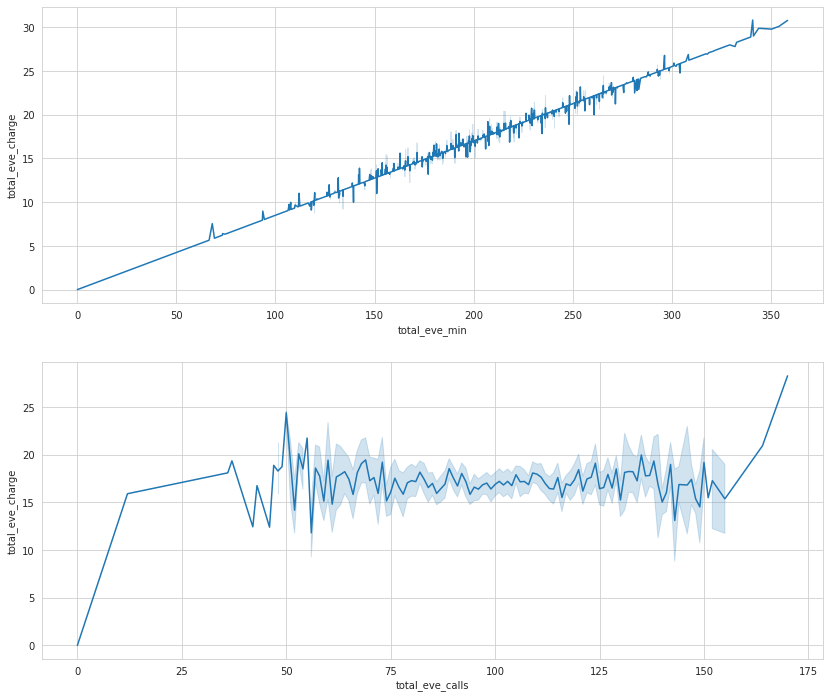

In [62]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_eve_min', y='total_eve_charge', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_eve_calls', y='total_eve_charge', ax=axes[1])
plt.show()

In [63]:
d_droped_train['total_eve_charge'] = d_droped_train.sort_values(['total_eve_min']).total_eve_charge.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_night_minutes

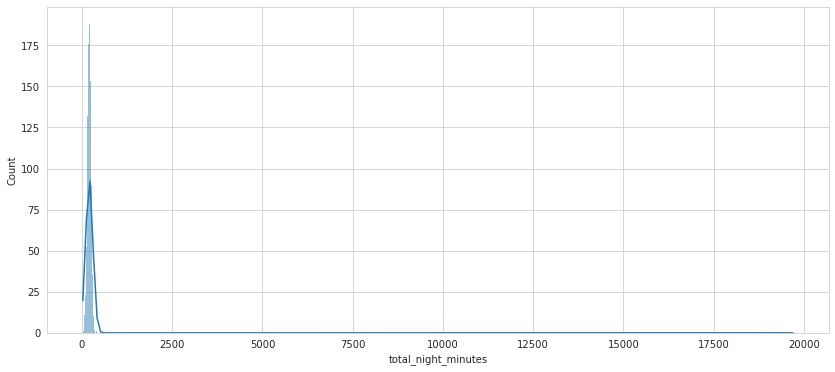

In [64]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_night_minutes', kde=True)
plt.show()

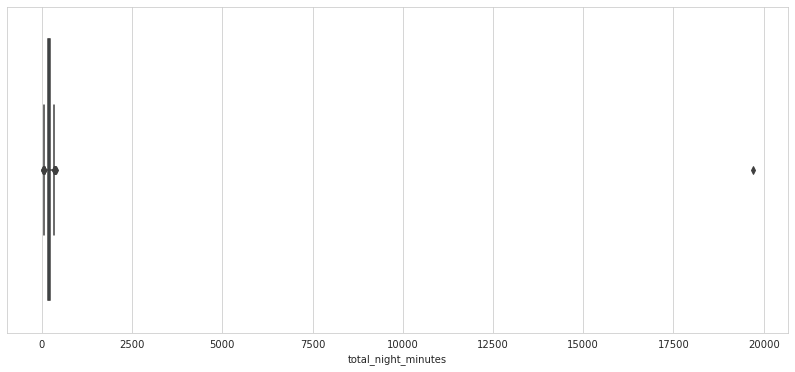

In [65]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_night_minutes')
plt.show()

In [66]:
d_droped_train[(d_droped_train.total_night_minutes > 500) | (d_droped_train.total_night_minutes < 5)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1009,2010,51.0,445,no,no,0.0,169.3,111.0,28.78,139.5,69.0,11.86,19700.0,87.0,8.87,12.0,3.0,3.24,0.0,No


In [67]:
d_droped_train.loc[d_droped_train['total_night_minutes'] > 500, 'total_night_minutes'] = np.nan
d_droped_train[d_droped_train.total_night_minutes.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
324,1325,103.0,547,no,no,0.0,167.8,121.0,28.53,212.9,123.0,18.10,NaN,73.0,9.37,13.0,3.0,3.51,5.0,No
647,1648,160.0,452,no,no,0.0,256.0,134.0,43.52,187.4,61.0,15.93,NaN,81.0,5.36,11.5,4.0,3.11,3.0,No
1009,2010,51.0,445,no,no,0.0,169.3,111.0,28.78,139.5,69.0,11.86,NaN,87.0,8.87,12.0,3.0,3.24,0.0,No


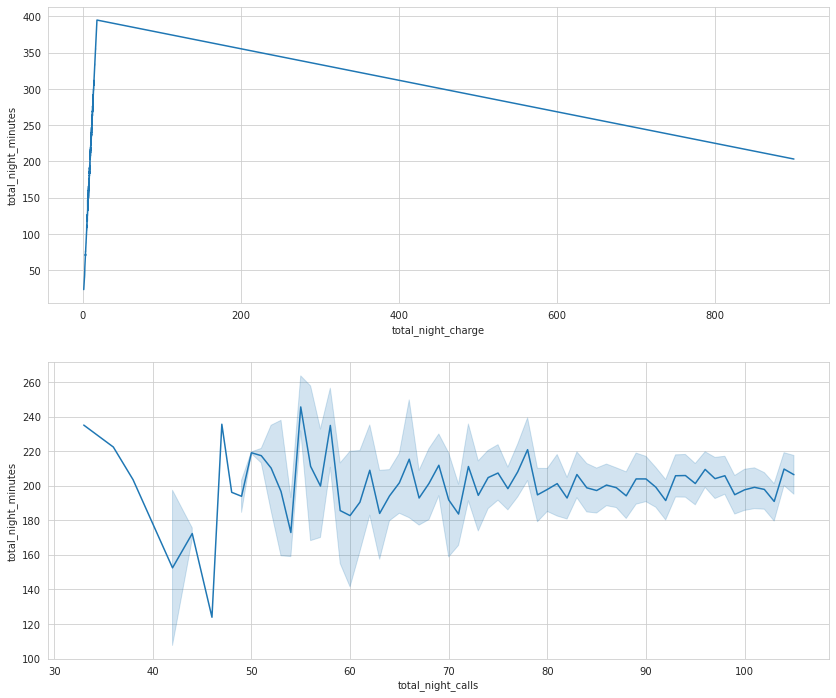

In [68]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_night_charge', y='total_night_minutes', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_night_calls', y='total_night_minutes', ax=axes[1])
plt.show()

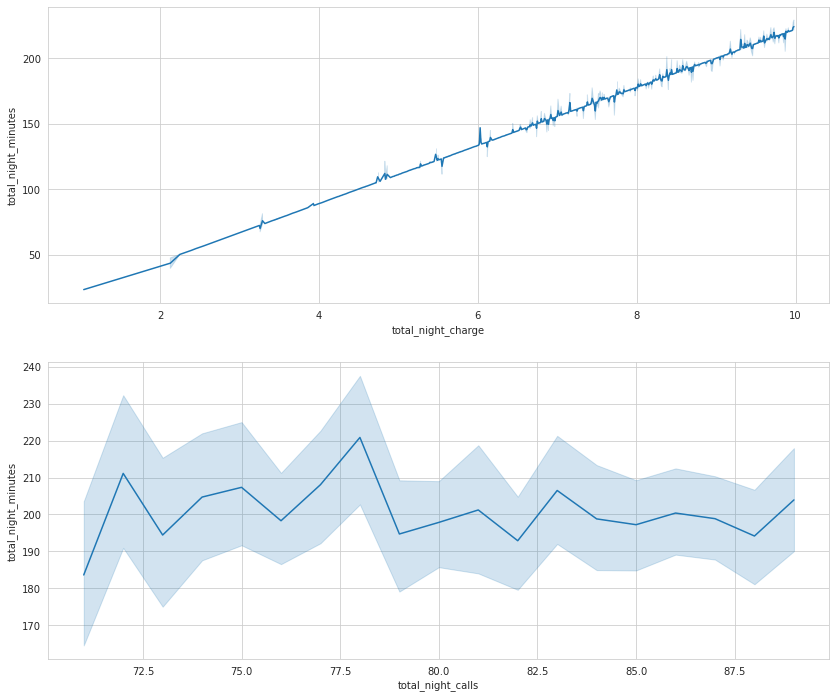

In [69]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train.loc[(d_droped_train.total_night_charge > 0) & 
                                     (d_droped_train.total_night_charge < 10)], x='total_night_charge', y='total_night_minutes', ax=axes[0])
sns.lineplot(data=d_droped_train.loc[(d_droped_train.total_night_calls > 70) & 
                                     (d_droped_train.total_night_calls < 90)], x='total_night_calls', y='total_night_minutes', ax=axes[1])
plt.show()

In [70]:
d_droped_train['total_night_minutes'] = d_droped_train.sort_values(['total_night_charge']).total_night_minutes.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

####  	total_night_calls

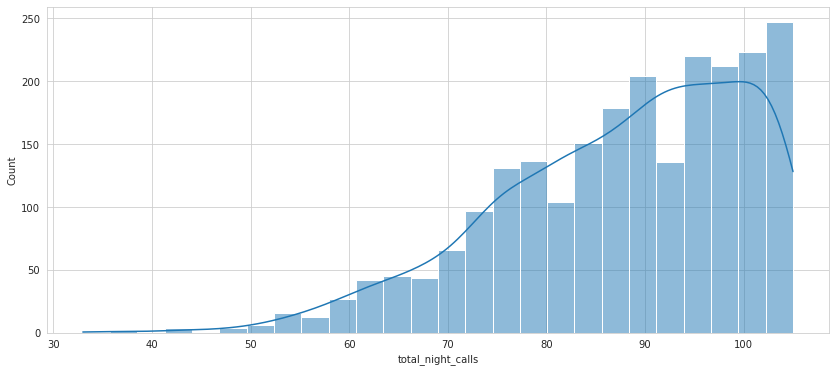

In [71]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_night_calls', kde=True)
plt.show()

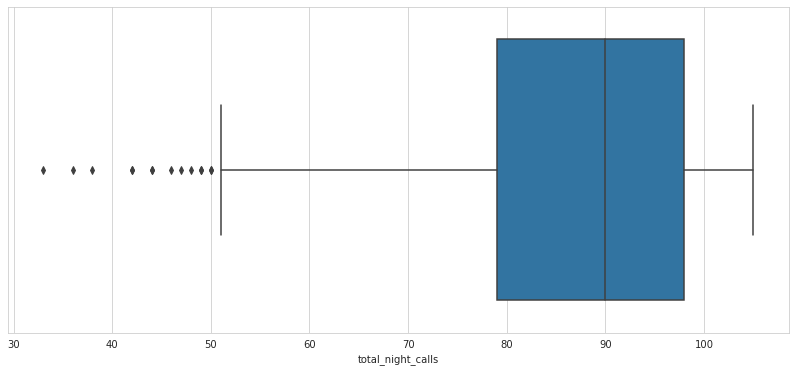

In [72]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_night_calls')
plt.show()

In [73]:
d_droped_train[d_droped_train.total_night_calls.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
339,1340,89.0,452,no,yes,35.0,174.4,108.0,29.650,196.7,100.0,16.72,127.4,NaN,5.73,11.8,3.0,NaN,1.0,No
492,1493,125.0,452,no,no,0.0,140.1,132.0,23.820,209.6,126.0,17.82,264.1,NaN,11.88,8.0,2.0,2.16,1.0,No
1128,2129,77.0,452,no,no,0.0,252.2,86.0,41.680,252.1,80.0,22.60,235.4,NaN,10.77,7.5,3.0,2.03,0.0,Yes
1887,2888,122.0,445,no,no,0.0,231.2,141.0,38.595,267.8,136.0,22.76,240.3,NaN,10.81,8.8,5.0,2.38,1.0,Yes
2200,3201,75.0,452,no,no,0.0,150.6,99.0,25.600,301.5,83.0,25.63,158.7,NaN,7.14,8.1,5.0,2.19,0.0,No


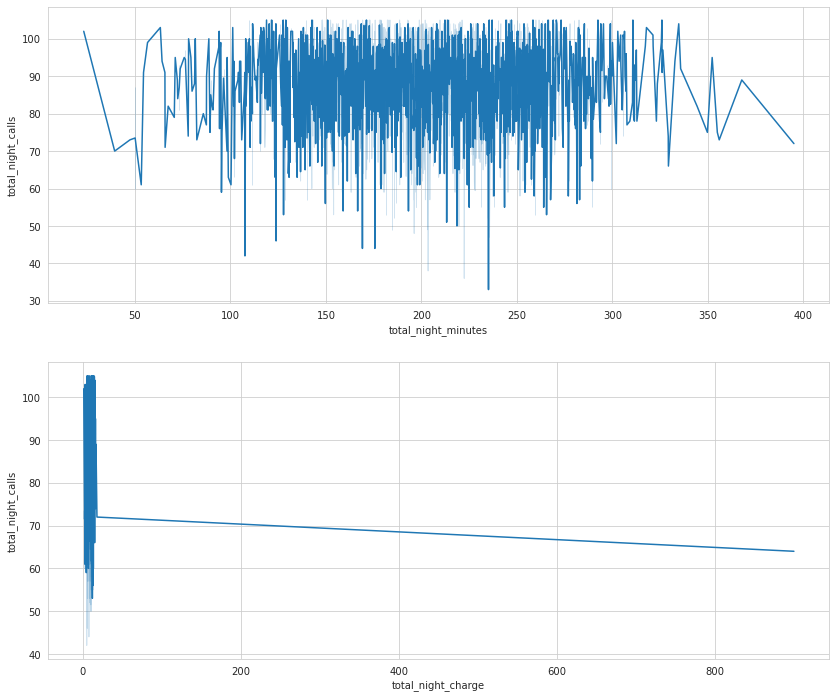

In [74]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_night_minutes', y='total_night_calls', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_night_charge', y='total_night_calls', ax=axes[1])
plt.show()

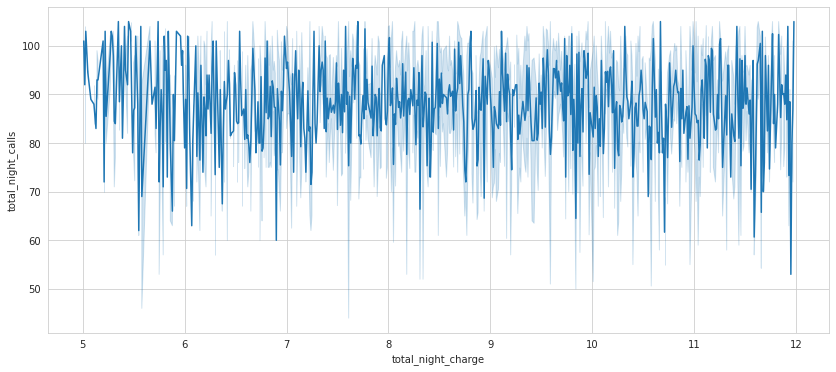

In [75]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=d_droped_train.loc[(d_droped_train.total_night_charge > 5) & 
                                     (d_droped_train.total_night_charge < 12)], x='total_night_charge', y='total_night_calls')
plt.show()

In [76]:
d_droped_train['total_night_calls'] = d_droped_train.sort_values(['total_night_minutes']).total_night_calls.ffill().sort_index()

#### total_night_charge

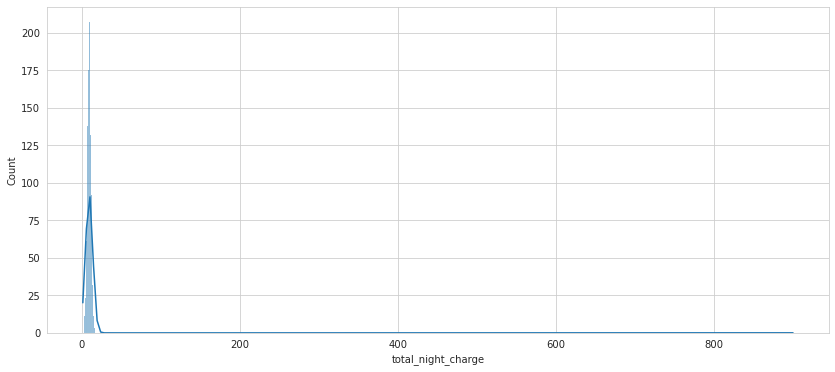

In [77]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_night_charge', kde=True)
plt.show()

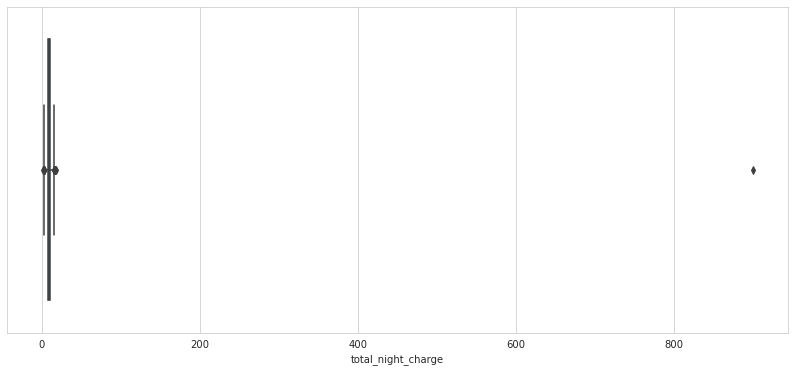

In [78]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_night_charge')
plt.show()

In [79]:
d_droped_train[(d_droped_train.total_night_charge > 150) | (d_droped_train.total_night_charge < 3)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
68,1069,164.0,445,no,yes,25.0,219.1,88.0,37.25,151.5,99.0,12.88,50.1,60.0,2.25,14.3,6.0,3.86,1.0,No
84,1085,101.0,452,no,no,0.0,118.6,89.0,20.16,199.6,97.0,16.97,53.3,61.0,2.40,11.5,5.0,3.11,1.0,No
129,1130,32.0,445,no,no,0.0,171.2,82.0,29.10,185.6,102.0,15.78,203.3,64.0,900.15,10.2,7.0,2.75,1.0,No
240,1241,146.0,547,no,no,0.0,152.4,104.0,23.53,153.9,117.0,14.51,39.4,70.0,2.13,3.9,10.0,1.05,4.0,Yes
247,1248,27.0,547,no,no,0.0,72.7,75.0,12.36,208.6,117.0,17.73,65.8,71.0,2.96,9.9,3.0,2.67,1.0,No
317,1318,146.0,547,no,no,0.0,138.4,104.0,23.53,158.9,122.0,13.51,47.4,73.0,2.13,3.9,9.0,1.05,4.0,Yes
966,1967,123.0,452,no,no,0.0,140.0,106.0,23.80,153.7,101.0,13.06,50.1,87.0,2.25,12.5,1.0,3.38,2.0,No
1226,2227,22.0,445,no,yes,14.0,199.1,100.0,33.85,221.8,103.0,18.85,65.7,91.0,2.96,4.2,1.0,1.13,1.0,No
1235,2236,165.0,452,no,no,0.0,207.7,109.0,35.31,164.8,94.0,14.01,54.5,91.0,2.45,7.9,3.0,2.13,0.0,No
1457,2458,135.0,452,no,no,0.0,173.4,107.0,29.48,222.0,84.0,18.87,64.2,94.0,2.89,13.7,6.0,3.70,1.0,No


In [80]:
d_droped_train.loc[d_droped_train['total_night_charge'] > 150, 'total_night_charge'] = np.nan
d_droped_train[d_droped_train.total_night_charge.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
129,1130,32.0,445,no,no,0.0,171.2,82.0,29.10,185.6,102.0,15.78,203.3,64.0,NaN,10.2,7.0,2.75,1.0,No
180,1181,24.0,445,no,no,0.0,151.0,70.0,25.33,126.0,87.0,11.14,224.6,67.0,NaN,8.6,2.0,2.32,2.0,Yes
579,1580,97.0,452,no,yes,24.0,133.2,135.0,22.64,217.2,58.0,18.46,70.6,79.0,NaN,11.0,3.0,2.97,1.0,No
618,1619,59.0,547,no,no,0.0,155.2,79.0,26.38,235.3,123.0,20.00,169.4,80.0,NaN,8.7,4.0,2.35,NaN,No
654,1655,106.0,452,no,no,0.0,187.1,104.0,31.81,250.2,117.0,21.26,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
678,1679,156.0,547,no,no,0.0,123.7,96.0,21.03,103.0,80.0,8.76,189.4,82.0,NaN,13.1,4.0,3.54,1.0,No


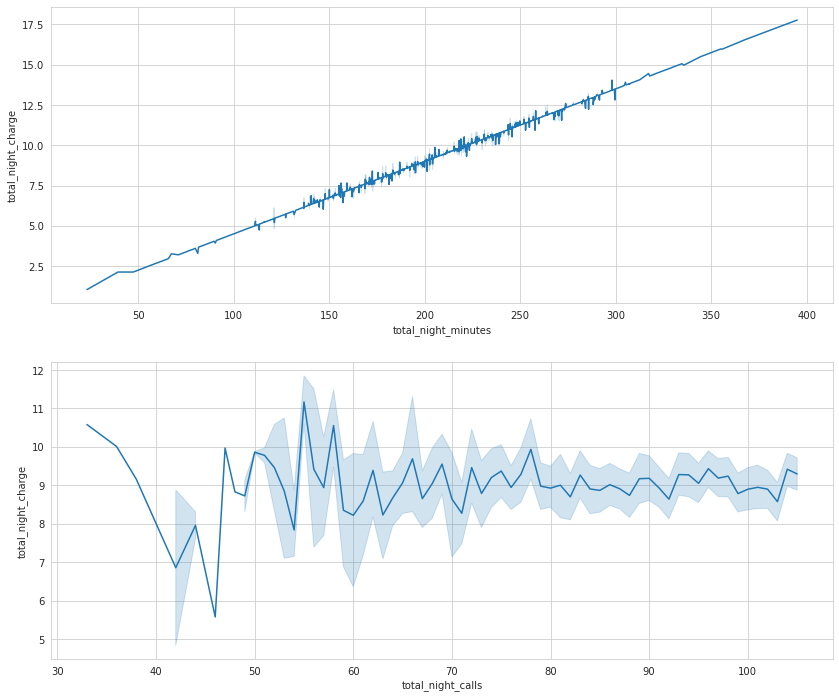

In [81]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_night_minutes', y='total_night_charge', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_night_calls', y='total_night_charge', ax=axes[1])
plt.show()

In [82]:
d_droped_train['total_night_charge'] = d_droped_train.sort_values(['total_night_minutes']).total_night_charge.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_intl_minutes

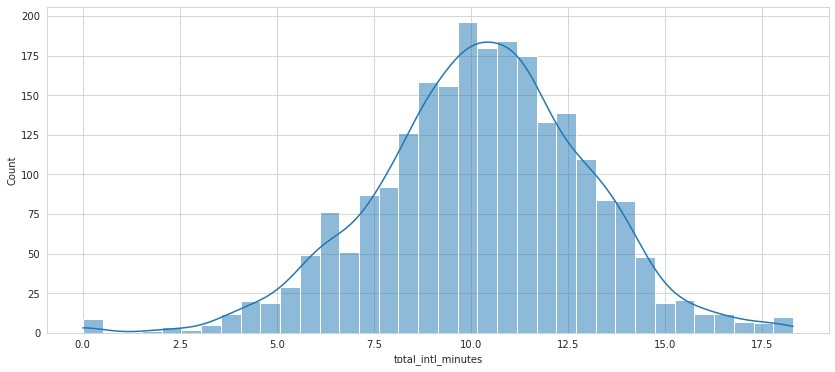

In [83]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_intl_minutes', kde=True)
plt.show()

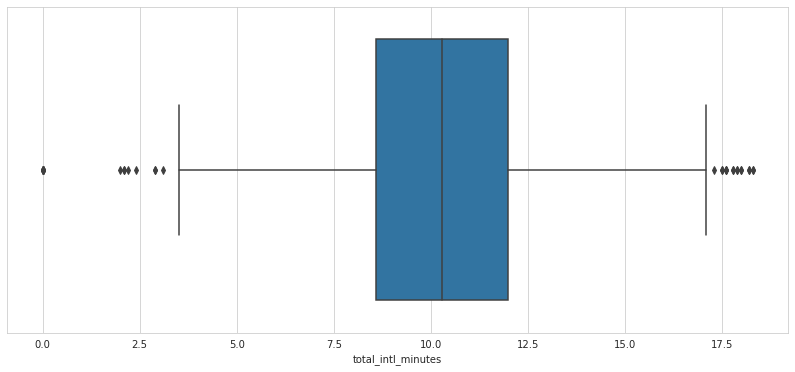

In [84]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_intl_minutes')
plt.show()

In [85]:
d_droped_train[(d_droped_train.total_intl_minutes > 18) | (d_droped_train.total_intl_minutes < 2)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
341,1342,100.0,452,no,no,0.0,191.9,95.0,32.62,200.9,101.0,17.08,271.9,74.0,12.24,18.2,3.0,4.91,1.0,No
362,1363,62.0,452,no,no,0.0,281.0,66.0,47.77,160.6,108.0,13.65,77.9,74.0,3.51,0.0,0.0,0.00,1.0,No
505,1506,87.0,452,no,yes,19.0,165.8,122.0,28.19,186.9,89.0,15.89,249.7,78.0,11.24,0.0,0.0,0.00,1.0,No
520,1521,106.0,452,no,no,0.0,114.4,104.0,19.45,78.3,101.0,6.66,232.7,78.0,10.47,0.0,0.0,0.00,2.0,No
538,1539,137.0,547,no,no,0.0,97.5,95.0,16.58,195.8,82.0,16.64,288.8,78.0,13.00,0.0,0.0,0.00,1.0,No
813,1814,98.0,445,no,yes,21.0,64.6,98.0,10.98,176.1,86.0,14.97,244.8,84.0,11.02,0.0,0.0,0.00,2.0,No
969,1970,58.0,445,no,no,0.0,174.4,112.0,29.65,265.8,122.0,22.59,182.4,87.0,8.21,0.0,0.0,0.00,4.0,No
983,1984,194.0,445,no,no,0.0,48.4,101.0,8.23,281.1,138.0,23.89,218.5,87.0,9.83,18.2,1.0,4.91,1.0,No
1026,2027,98.0,445,no,no,0.0,288.1,101.0,48.98,137.9,93.0,11.72,206.5,88.0,9.29,0.0,0.0,0.00,0.0,No
1495,2496,127.0,547,no,no,0.0,107.9,128.0,18.34,187.0,77.0,15.90,218.5,95.0,9.83,0.0,0.0,0.00,0.0,No


In [86]:
d_droped_train[d_droped_train.total_intl_minutes.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
298,1299,106.0,445,no,yes,29.0,83.6,131.0,14.255,203.9,131.0,17.326667,229.5,73.0,10.33,NaN,3.0,2.19,1.0,No
789,1790,60.0,445,yes,yes,29.0,279.9,107.0,43.200,218.8,91.0,19.340000,121.1,83.0,4.86,NaN,13.0,3.78,0.0,Yes


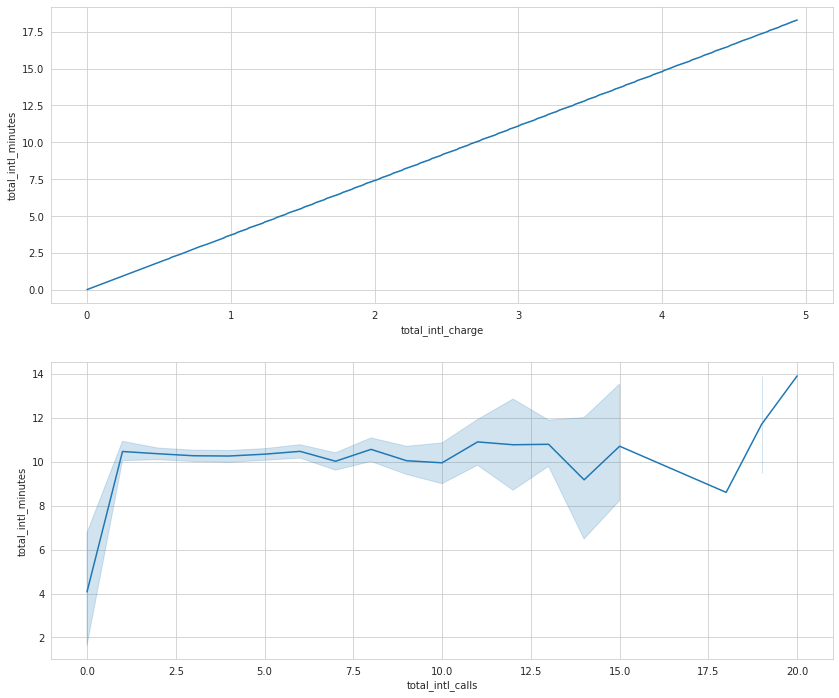

In [87]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_intl_charge', y='total_intl_minutes', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_intl_calls', y='total_intl_minutes', ax=axes[1])
plt.show()

In [88]:
d_droped_train['total_intl_minutes'] = d_droped_train.sort_values(['total_intl_charge']).total_intl_minutes.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_intl_calls

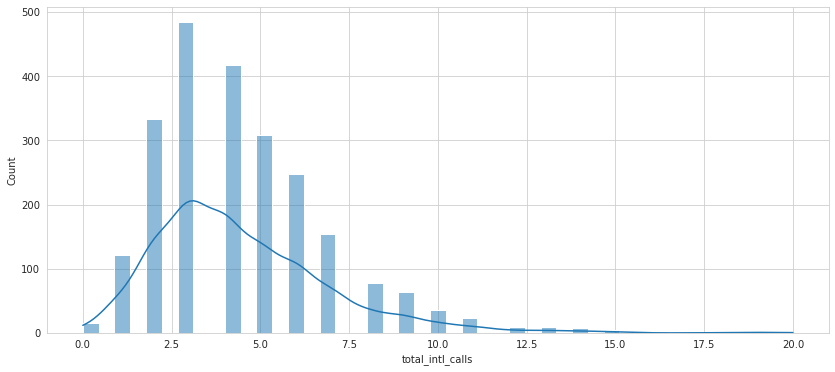

In [89]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_intl_calls', kde=True)
plt.show()

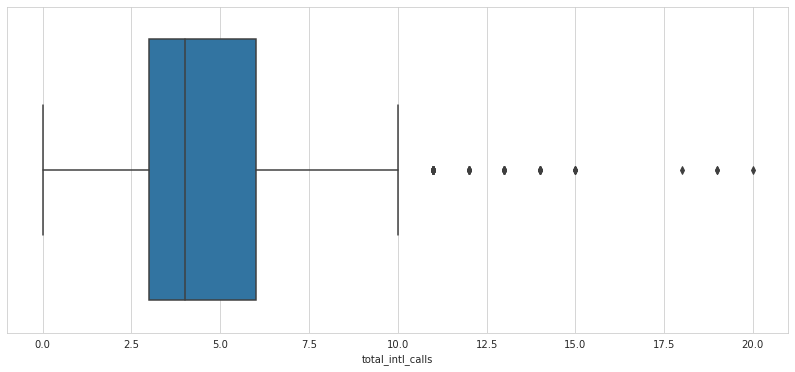

In [90]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_intl_calls')
plt.show()

In [91]:
d_droped_train[(d_droped_train.total_intl_calls > 15) | (d_droped_train.total_intl_calls < 1)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
362,1363,62.0,452,no,no,0.0,281.0,66.0,47.77,160.6,108.0,13.65,77.9,74.0,3.51,0.0,0.0,0.00,1.0,No
387,1388,112.0,452,no,no,0.0,81.6,94.0,13.87,268.1,112.0,22.79,140.8,75.0,6.34,8.6,18.0,2.32,1.0,No
503,1504,130.0,452,no,no,0.0,183.0,112.0,31.11,72.9,99.0,6.20,181.8,78.0,8.18,9.5,19.0,2.57,0.0,No
505,1506,87.0,452,no,yes,19.0,165.8,122.0,28.19,186.9,89.0,15.89,249.7,78.0,11.24,0.0,0.0,0.00,1.0,No
520,1521,106.0,452,no,no,0.0,114.4,104.0,19.45,78.3,101.0,6.66,232.7,78.0,10.47,0.0,0.0,0.00,2.0,No
538,1539,137.0,547,no,no,0.0,97.5,95.0,16.58,195.8,82.0,16.64,288.8,78.0,13.00,0.0,0.0,0.00,1.0,No
813,1814,98.0,445,no,yes,21.0,64.6,98.0,10.98,176.1,86.0,14.97,244.8,84.0,11.02,0.0,0.0,0.00,2.0,No
839,1840,147.0,445,no,no,0.0,290.0,89.0,47.58,239.8,86.0,20.70,283.6,84.0,12.76,6.2,0.0,1.67,0.0,Yes
969,1970,58.0,445,no,no,0.0,174.4,112.0,29.65,265.8,122.0,22.59,182.4,87.0,8.21,0.0,0.0,0.00,4.0,No
1018,2019,119.0,445,no,no,0.0,287.1,118.0,50.81,165.3,99.0,12.54,218.8,87.0,9.76,13.9,0.0,3.75,2.0,Yes


In [92]:
d_droped_train.loc[(d_droped_train['total_intl_minutes'] > 0) & 
                   (d_droped_train['total_intl_charge'] > 0) & 
                   (d_droped_train['total_intl_calls'] < 1), 'total_intl_calls'] = np.nan
d_droped_train[d_droped_train.total_intl_calls.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
93,1094,44.0,452,no,yes,34.0,221.8,105.0,37.71,161.7,85.0,13.74,227.7,62.0,10.25,14.0,NaN,3.78,0.0,No
522,1523,58.0,547,no,no,0.0,112.2,95.0,19.07,209.6,108.0,17.82,260.9,78.0,11.74,13.9,NaN,3.75,0.0,Yes
839,1840,147.0,445,no,no,0.0,290.0,89.0,47.58,239.8,86.0,20.70,283.6,84.0,12.76,6.2,NaN,1.67,0.0,Yes
1018,2019,119.0,445,no,no,0.0,287.1,118.0,50.81,165.3,99.0,12.54,218.8,87.0,9.76,13.9,NaN,3.75,2.0,Yes
1131,2132,111.0,547,no,no,0.0,179.9,97.0,29.07,106.8,58.0,9.74,209.7,89.0,9.62,10.5,NaN,NaN,4.0,Yes
1701,2702,17.0,547,no,yes,31.0,150.1,123.0,27.03,199.9,57.0,16.80,232.3,97.0,10.09,10.0,NaN,2.70,6.0,Yes
1844,2845,82.0,452,no,no,0.0,165.1,76.0,28.41,138.8,81.0,12.20,188.4,99.0,8.43,9.4,NaN,2.54,6.0,Yes
1917,2918,151.0,452,yes,no,0.0,218.0,59.0,39.06,119.4,94.0,8.72,273.2,100.0,12.11,12.4,NaN,3.35,0.0,Yes
2071,3072,90.0,452,yes,no,0.0,136.2,91.0,24.19,223.4,108.0,19.73,139.2,102.0,6.04,9.2,NaN,2.48,4.0,Yes


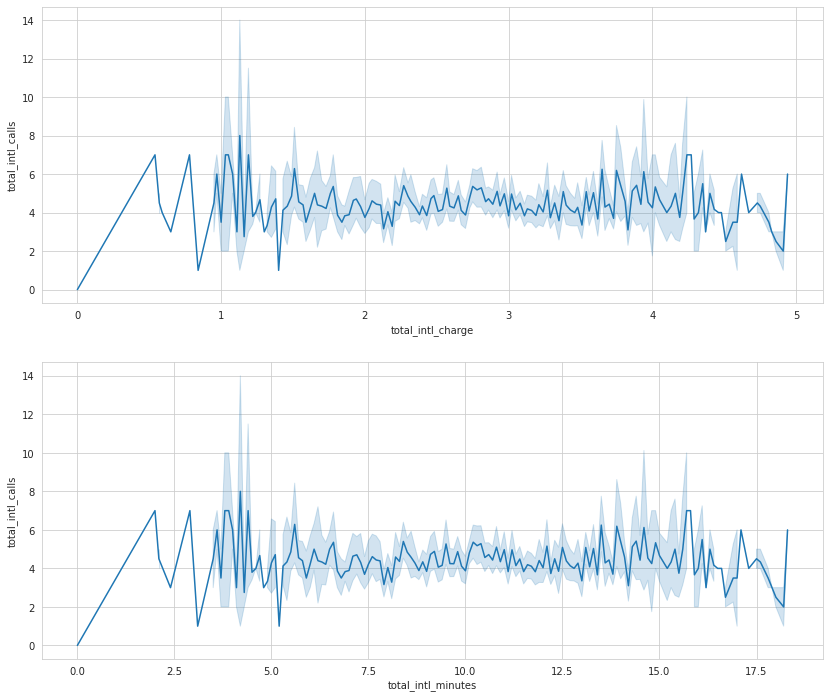

In [93]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_intl_charge', y='total_intl_calls', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_intl_minutes', y='total_intl_calls', ax=axes[1])
plt.show()

In [94]:
d_droped_train['total_intl_calls'] = d_droped_train.sort_values(['total_intl_minutes']).total_intl_calls.ffill().sort_index()

#### total_intl_charge

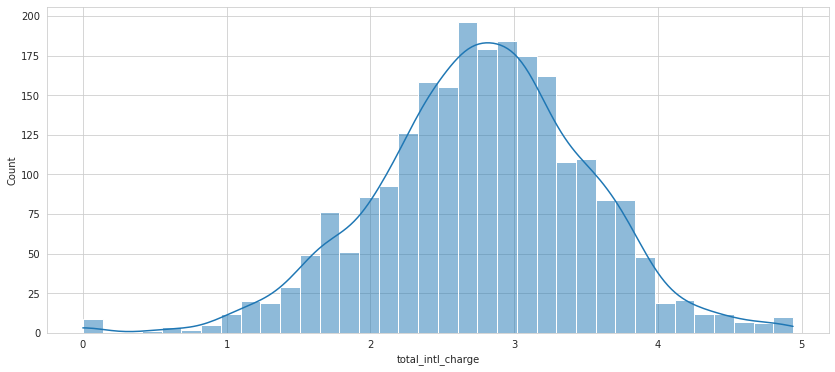

In [95]:
plt.figure(figsize=(14, 6))
sns.histplot(data=d_droped_train, x='total_intl_charge', kde=True)
plt.show()

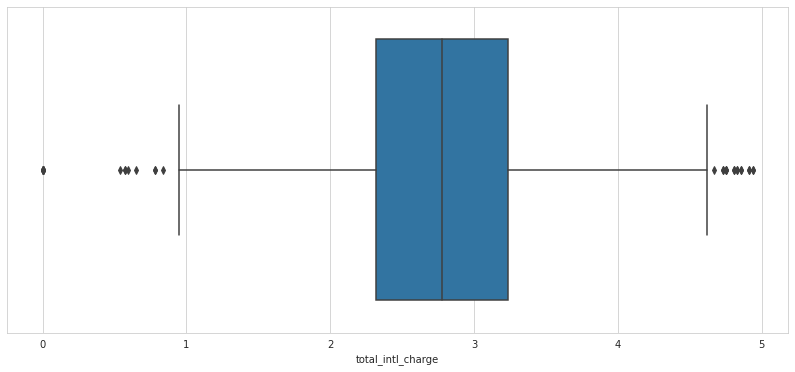

In [96]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=d_droped_train, x='total_intl_charge')
plt.show()

In [97]:
d_droped_train[(d_droped_train.total_intl_charge > 4.8) | (d_droped_train.total_intl_charge < 0.5)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
143,1144,172.0,445,no,no,0.0,203.9,109.0,34.66,234.0,123.0,19.89,160.7,65.0,7.23,17.8,4.0,4.81,4.0,No
341,1342,100.0,452,no,no,0.0,191.9,95.0,32.62,200.9,101.0,17.08,271.9,74.0,12.24,18.2,3.0,4.91,1.0,No
362,1363,62.0,452,no,no,0.0,281.0,66.0,47.77,160.6,108.0,13.65,77.9,74.0,3.51,0.0,0.0,0.00,1.0,No
505,1506,87.0,452,no,yes,19.0,165.8,122.0,28.19,186.9,89.0,15.89,249.7,78.0,11.24,0.0,0.0,0.00,1.0,No
520,1521,106.0,452,no,no,0.0,114.4,104.0,19.45,78.3,101.0,6.66,232.7,78.0,10.47,0.0,0.0,0.00,2.0,No
538,1539,137.0,547,no,no,0.0,97.5,95.0,16.58,195.8,82.0,16.64,288.8,78.0,13.00,0.0,0.0,0.00,1.0,No
813,1814,98.0,445,no,yes,21.0,64.6,98.0,10.98,176.1,86.0,14.97,244.8,84.0,11.02,0.0,0.0,0.00,2.0,No
969,1970,58.0,445,no,no,0.0,174.4,112.0,29.65,265.8,122.0,22.59,182.4,87.0,8.21,0.0,0.0,0.00,4.0,No
983,1984,194.0,445,no,no,0.0,48.4,101.0,8.23,281.1,138.0,23.89,218.5,87.0,9.83,18.2,1.0,4.91,1.0,No
1026,2027,98.0,445,no,no,0.0,288.1,101.0,48.98,137.9,93.0,11.72,206.5,88.0,9.29,0.0,0.0,0.00,0.0,No


In [98]:
d_droped_train[d_droped_train.total_intl_charge.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
339,1340,89.0,452,no,yes,35.0,174.4,108.0,29.65,196.7,100.0,16.72,127.4,77.0,5.73,11.8,3.0,NaN,1.0,No
1131,2132,111.0,547,no,no,0.0,179.9,97.0,29.07,106.8,58.0,9.74,209.7,89.0,9.62,10.5,5.0,NaN,4.0,Yes
1886,2887,154.0,445,no,yes,35.0,224.0,102.0,38.08,192.0,99.0,16.32,163.1,100.0,7.34,9.6,2.0,NaN,0.0,No
2004,3005,166.0,452,no,no,0.0,220.7,106.0,37.52,177.8,118.0,15.11,206.1,102.0,9.27,12.4,9.0,NaN,1.0,No
2072,3073,141.0,547,no,yes,28.0,308.0,123.0,52.36,247.8,128.0,21.06,152.9,103.0,6.88,7.4,3.0,NaN,1.0,No


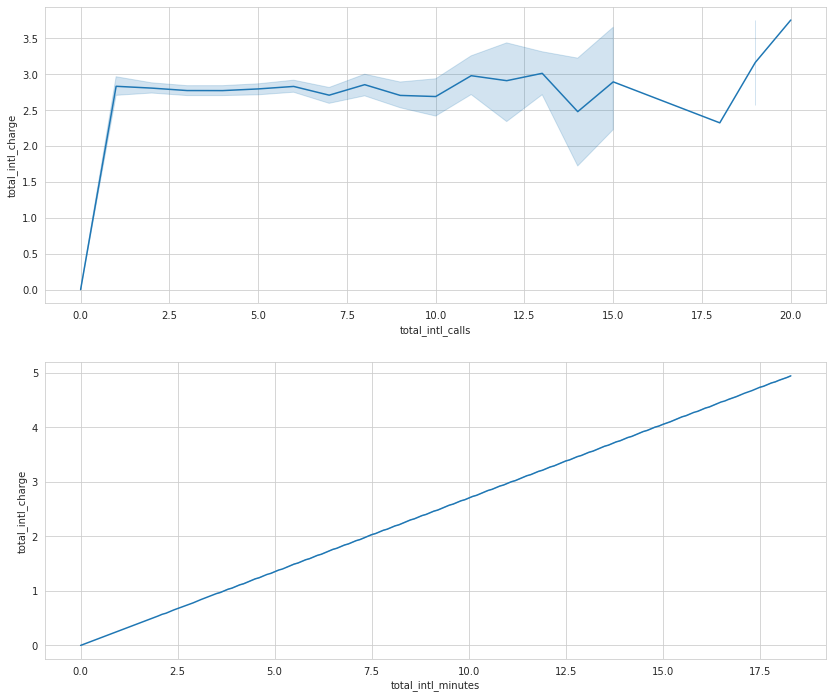

In [99]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(14)
fig.set_figheight(12)
sns.lineplot(data=d_droped_train, x='total_intl_calls', y='total_intl_charge', ax=axes[0])
sns.lineplot(data=d_droped_train, x='total_intl_minutes', y='total_intl_charge', ax=axes[1])
plt.show()

In [100]:
d_droped_train['total_intl_charge'] = d_droped_train.sort_values(['total_intl_minutes']).total_intl_charge.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### customer_service_calls

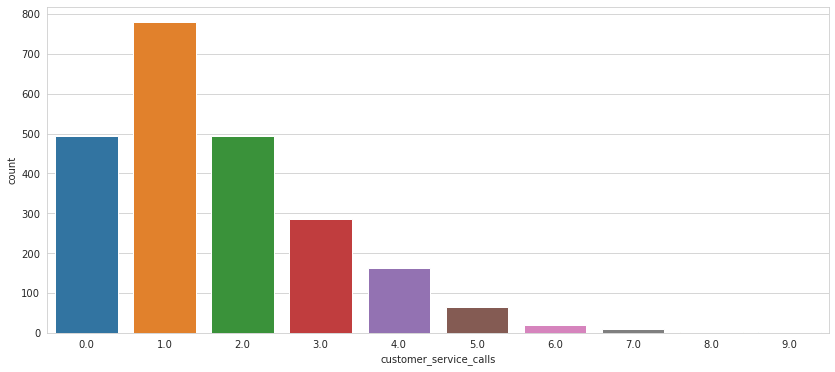

In [101]:
plt.figure(figsize=(14, 6))
sns.countplot(data=d_droped_train, x='customer_service_calls')
plt.show()

In [102]:
print(d_droped_train[(d_droped_train.Churn == 'Yes')].customer_service_calls.median())
d_droped_train[(d_droped_train.Churn == 'Yes')].customer_service_calls.value_counts()

2.0


1.0    134
0.0    124
4.0     95
2.0     92
3.0     54
5.0     49
6.0     14
7.0      9
9.0      2
8.0      2
Name: customer_service_calls, dtype: int64

In [103]:
print(d_droped_train[(d_droped_train.Churn == 'No')].customer_service_calls.median())
d_droped_train[(d_droped_train.Churn == 'No')].customer_service_calls.value_counts()

1.0


1.0    643
2.0    402
0.0    370
3.0    231
4.0     67
5.0     16
6.0      7
Name: customer_service_calls, dtype: int64

In [104]:
d_droped_train[d_droped_train.customer_service_calls.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
618,1619,59.0,547,no,no,0.0,155.2,79.0,26.38,235.3,123.0,20.0,169.4,80.0,7.62,8.7,4.0,2.35,NaN,No


In [105]:
d_droped_train['customer_service_calls'].fillna(1, inplace=True)

#### Churn

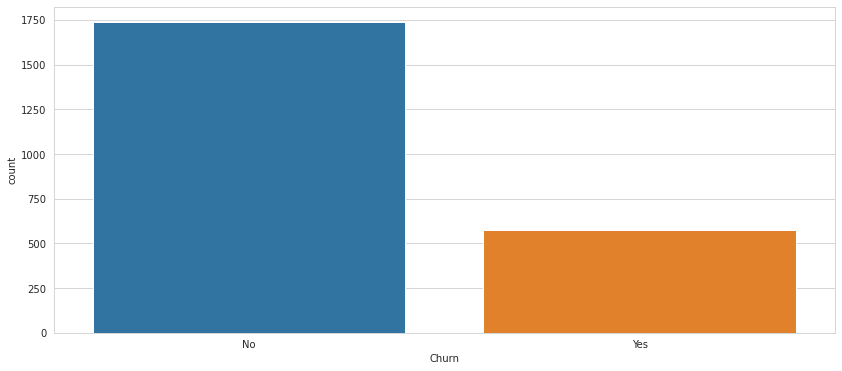

In [106]:
plt.figure(figsize=(14, 6))
sns.countplot(data=d_droped_train, x='Churn')
plt.show()

In [107]:
odm_handled_train = d_droped_train.dropna(subset=['Churn'])

In [108]:
odm_handled_train.isnull().sum()

customer_id               0
account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
Churn                     0
dtype: int64

In [109]:
odm_handled_train.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,2312.0,2160.234862,669.933019,1001.00,1579.750,2161.50,2740.2500,3321.00
account_length,2312.0,101.327422,39.923689,1.00,74.000,101.00,127.0000,232.00
location_code,2312.0,473.525519,42.039577,445.00,445.000,452.00,452.0000,547.00
number_vm_messages,2312.0,7.677336,13.588330,0.00,0.000,0.00,14.2500,51.00
total_day_min,2312.0,182.293728,57.676655,0.00,144.175,180.45,221.0000,350.80
total_day_calls,2312.0,100.795848,20.500104,0.00,87.000,102.00,115.0000,165.00
total_day_charge,2312.0,30.988060,9.769172,0.00,24.495,30.60,37.6050,60.96
total_eve_min,2312.0,201.511657,50.923300,0.00,165.975,202.50,236.4000,358.50
total_eve_calls,2312.0,100.249135,19.834173,0.00,87.000,101.00,114.0000,170.00
total_eve_charge,2312.0,17.135067,4.323572,0.00,14.190,17.22,20.0900,30.83


In [110]:
odm_handled_train

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,3317,109.0,452,no,no,0.0,180.0,100.0,30.60,229.0,103.0,19.47,139.4,105.0,6.27,7.8,8.0,2.11,3.0,No
2317,3318,185.0,452,yes,yes,30.0,154.1,114.0,26.20,118.7,106.0,10.09,258.4,105.0,11.63,12.9,3.0,3.48,2.0,No
2318,3319,55.0,452,yes,no,0.0,188.9,88.0,34.62,270.1,105.0,22.77,209.7,105.0,9.17,14.3,5.0,3.86,1.0,Yes
2319,3320,138.0,547,yes,no,0.0,191.2,130.0,32.35,164.5,88.0,14.00,241.4,105.0,10.46,15.2,1.0,4.10,0.0,Yes


In [111]:
odm_handled_train.to_csv(cleaned_train_path, index=False)

### Test Dataframe

In [112]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             1500 non-null   int64  
 1   account_length          1500 non-null   int64  
 2   location_code           1498 non-null   float64
 3   intertiol_plan          1496 non-null   object 
 4   voice_mail_plan         1496 non-null   object 
 5   number_vm_messages      1499 non-null   float64
 6   total_day_min           1497 non-null   float64
 7   total_day_calls         1497 non-null   float64
 8   total_day_charge        1496 non-null   float64
 9   total_eve_min           1498 non-null   float64
 10  total_eve_calls         1500 non-null   int64  
 11  total_eve_charge        1491 non-null   float64
 12  total_night_minutes     1497 non-null   float64
 13  total_night_calls       1498 non-null   float64
 14  total_night_charge      1498 non-null   

In [113]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,1500.0,4071.500000,433.157015,3322.00,3696.7500,4071.500,4446.2500,4821.00
account_length,1500.0,101.042000,39.454167,1.00,73.0000,100.000,127.2500,243.00
location_code,1498.0,475.508678,43.035587,445.00,452.0000,452.000,547.0000,547.00
number_vm_messages,1499.0,7.805871,13.376356,0.00,0.0000,0.000,18.0000,50.00
total_day_min,1497.0,184.498798,56.977595,2.60,144.6000,184.100,222.1000,345.30
total_day_calls,1497.0,100.085504,20.531492,-85.00,87.0000,100.000,113.0000,157.00
total_day_charge,1496.0,31.314693,10.014655,-46.48,24.6425,31.300,37.8575,59.36
total_eve_min,1498.0,203.982443,51.534663,42.50,168.3250,203.850,238.1750,363.70
total_eve_calls,1500.0,100.034000,19.994950,44.00,87.0000,100.000,113.0000,168.00
total_eve_charge,1491.0,17.321415,4.366784,3.61,14.2700,17.330,20.2100,30.91


### <u>Data Cleaning</u>

### Deteact & Remove Duplicates

In [114]:
test_df.drop(columns=['customer_id']).duplicated().value_counts()

False    1500
dtype: int64

### Handling Missing Values & Out of Range Values

In [115]:
test_df.isnull().sum()

customer_id                  0
account_length               0
location_code                2
intertiol_plan               4
voice_mail_plan              4
number_vm_messages           1
total_day_min                3
total_day_calls              3
total_day_charge             4
total_eve_min                2
total_eve_calls              0
total_eve_charge             9
total_night_minutes          3
total_night_calls            2
total_night_charge           2
total_intl_minutes           2
total_intl_calls             3
total_intl_charge            0
customer_service_calls       1
Unnamed: 19               1500
Unnamed: 20               1500
dtype: int64

In [116]:
test_df = test_df.drop(columns=['Unnamed: 19', 'Unnamed: 20'])

In [117]:
cols = test_df.select_dtypes([np.number]).columns
test_df[cols] = test_df[cols].abs()

#### account_length

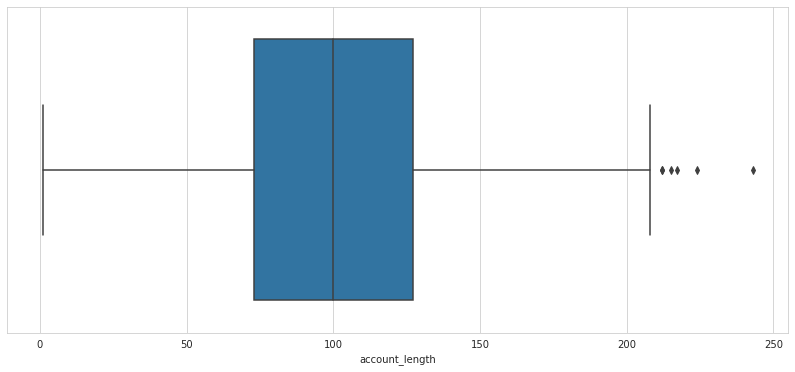

19.333333333333332


In [118]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=test_df, x='account_length')
plt.show()
print(d_droped_train.account_length.max()/12)

#### location_code

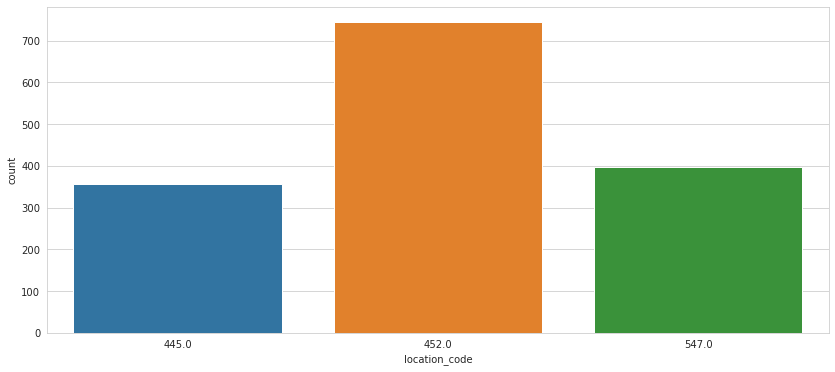

In [119]:
plt.figure(figsize=(14, 6))
sns.countplot(data=test_df, x='location_code')
plt.show()

In [120]:
(test_df[test_df.location_code == 452].total_day_charge / test_df[test_df.location_code == 452].total_day_min).mean()

0.17021692044749337

In [121]:
test_df[test_df.location_code.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
714,4036,134,NaN,no,yes,32.0,80.3,94.0,13.65,199.9,124,16.99,170.8,117.0,7.69,16.6,3.0,4.48,0.0
1228,4550,60,NaN,no,no,0.0,220.6,57.0,37.50,211.1,115,17.94,249.0,129.0,11.21,6.8,3.0,1.84,1.0


In [122]:
test_df.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,3322,91,445.0,yes,no,0.0,258.4,112.0,42.89,190.0,93,14.47,158.6,105.0,7.09,12.1,3.0,3.27,2.0
1,3323,113,445.0,no,yes,20.0,155.8,81.0,28.83,168.5,62,13.73,275.5,105.0,12.22,8.7,3.0,2.35,5.0
2,3324,122,445.0,no,no,0.0,237.2,137.0,40.30,263.8,134,22.76,251.3,105.0,10.81,8.8,4.0,2.38,1.0
3,3325,103,445.0,no,no,0.0,133.6,117.0,23.60,156.1,130,13.37,207.2,105.0,9.95,10.4,7.0,2.81,8.0
4,3326,111,452.0,no,no,0.0,115.6,120.0,24.54,211.1,66,18.79,140.9,105.0,5.76,12.7,1.0,3.43,4.0


In [123]:
test_df.tail()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
1495,4817,23,547.0,no,no,0.0,321.6,107.0,54.67,251.6,115,21.39,141.1,158.0,6.35,11.3,3.0,3.05,2.0
1496,4818,23,547.0,no,no,0.0,334.6,107.0,52.67,261.6,121,21.39,127.1,158.0,6.35,11.3,2.0,3.05,2.0
1497,4819,103,452.0,no,no,0.0,70.9,134.0,12.05,134.5,112,11.43,168.8,164.0,7.60,12.0,6.0,3.24,2.0
1498,4820,34,452.0,no,no,0.0,193.7,74.0,32.93,126.9,84,10.79,221.2,166.0,9.95,8.8,4.0,2.38,0.0
1499,4821,129,452.0,no,yes,33.0,119.6,104.0,20.33,278.7,88,23.69,263.4,175.0,11.85,5.9,2.0,1.59,2.0


In [124]:
test_df['location_code'] = test_df['location_code'].ffill()

#### intertiol_plan

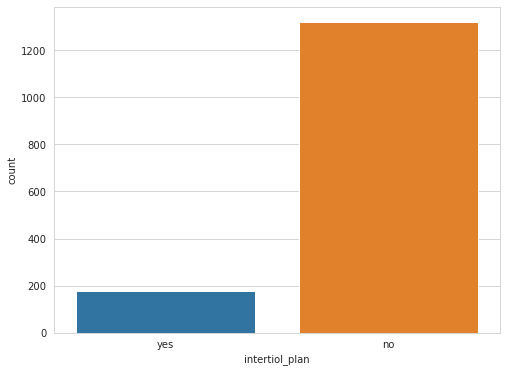

In [125]:
plt.figure(figsize=(8, 6))
sns.countplot(data=test_df, x='intertiol_plan')
plt.show()

In [126]:
test_df['intertiol_plan'].fillna('no', inplace=True)

#### voice_mail_plan

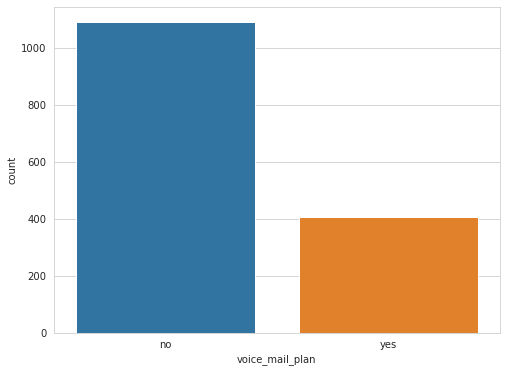

0.0    1088
Name: number_vm_messages, dtype: int64
8.0


,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
112,3434,141,452.0,no,NaN,0.0,160.1,87.0,27.22,NaN,120,21.82,270.0,107.0,12.15,7.0,1.0,1.89,2.0
611,3933,113,452.0,no,NaN,0.0,215.6,96.0,36.65,193.4,127,16.44,105.4,115.0,4.74,13.5,3.0,3.65,1.0
859,4181,120,452.0,no,NaN,0.0,149.2,98.0,25.36,193.6,88,16.46,248.9,119.0,11.20,11.1,5.0,3.00,1.0
1436,4758,74,547.0,yes,NaN,0.0,125.8,103.0,21.39,207.7,96,17.65,207.4,143.0,9.33,14.1,NaN,3.81,1.0


In [127]:
plt.figure(figsize=(8, 6))
sns.countplot(data=test_df, x='voice_mail_plan')
plt.show()
print(test_df[test_df.voice_mail_plan == 'no'].number_vm_messages.value_counts())
print(test_df[test_df.voice_mail_plan == 'yes'].number_vm_messages.min())
test_df[test_df.voice_mail_plan.isnull()]

In [128]:
test_df['voice_mail_plan'].fillna('no', inplace=True)

#### number_vm_messages

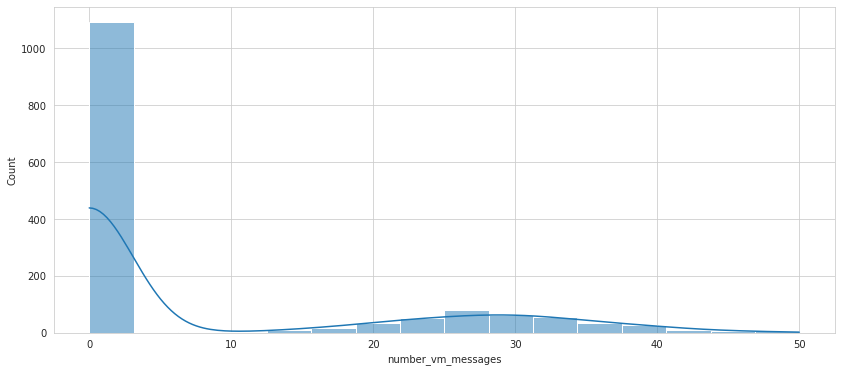

In [129]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='number_vm_messages', kde=True)
plt.show()

In [130]:
test_df[test_df['number_vm_messages'].isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
828,4150,51,547.0,no,no,NaN,181.5,108.0,30.86,196.9,87,NaN,187.2,119.0,8.42,10.3,2.0,2.78,1.0


In [131]:
test_df['number_vm_messages'].fillna(0, inplace=True)

#### total_day_min

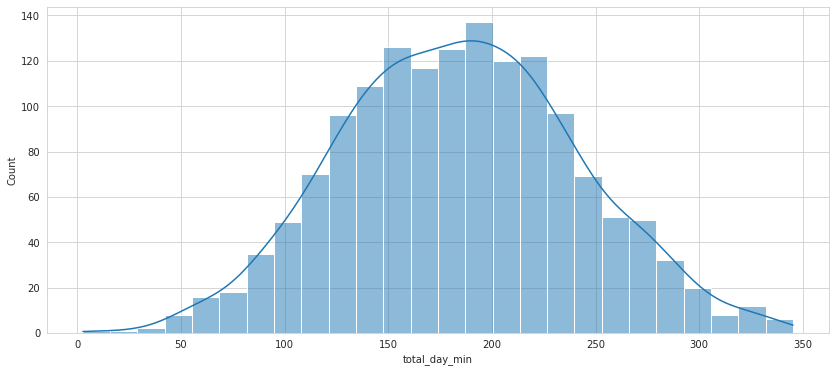

In [132]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_day_min', kde=True)
plt.show()

In [133]:
test_df[test_df['total_day_min'].isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
27,3349,126,445.0,no,no,0.0,NaN,99.0,54.62,NaN,93,14.27,193.6,106.0,8.71,8.0,4.0,2.16,1.0
357,3679,131,445.0,no,no,0.0,NaN,79.0,NaN,201.0,114,17.09,151.2,111.0,6.80,11.6,5.0,3.13,1.0
1310,4632,120,547.0,no,no,0.0,NaN,110.0,26.86,197.0,103,16.75,154.9,132.0,6.97,10.0,5.0,2.70,1.0


In [134]:
test_df['total_day_min'] = test_df.sort_values(['total_day_charge']).total_day_min.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_day_calls

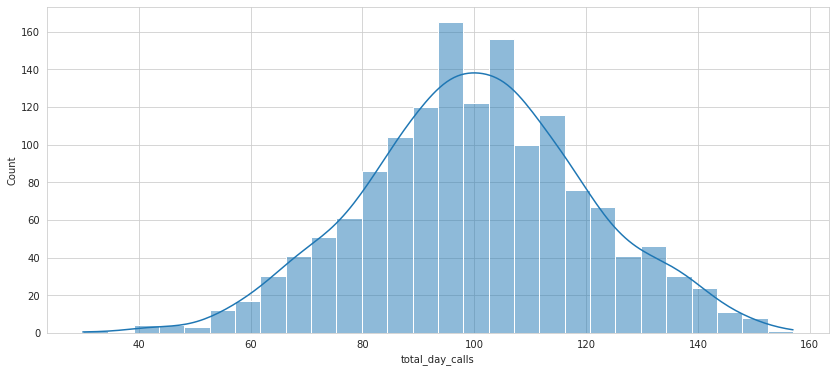

In [135]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_day_calls', kde=True)
plt.show()

In [136]:
test_df[test_df['total_day_calls'].isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
175,3497,58,547.0,no,yes,29.0,240.4,NaN,40.87,118.9,91,10.11,164.2,108.0,7.39,11.2,3.0,3.02,1.0
454,3776,47,445.0,no,yes,37.0,112.8,NaN,19.18,243.9,97,20.73,178.7,112.0,8.04,13.2,6.0,3.56,2.0
951,4273,154,452.0,no,no,0.0,191.4,NaN,32.54,205.4,119,NaN,205.7,121.0,9.26,10.2,3.0,2.75,3.0


In [137]:
test_df['total_day_calls'] = test_df.sort_values(['total_day_min']).total_day_calls.ffill().sort_index()

#### total_day_charge

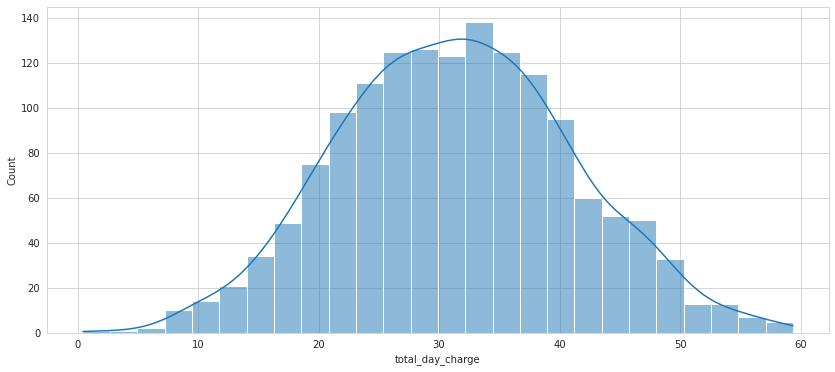

In [138]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_day_charge', kde=True)
plt.show()

In [139]:
test_df[test_df['total_day_charge'].isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
160,3482,21,452.0,no,no,0.0,146.0,78.0,NaN,109.7,79,NaN,247.4,108.0,11.13,6.8,7.0,1.84,0.0
357,3679,131,445.0,no,no,0.0,121.4,79.0,NaN,201.0,114,17.09,151.2,111.0,6.80,11.6,5.0,3.13,1.0
609,3931,193,452.0,no,no,0.0,96.8,92.0,NaN,142.6,103,12.12,210.1,115.0,9.45,10.9,5.0,2.94,2.0
1380,4702,61,452.0,no,yes,15.0,252.4,106.0,NaN,187.8,69,NaN,259.6,137.0,11.68,10.0,3.0,2.70,2.0


In [140]:
test_df['total_day_charge'] = test_df.sort_values(['total_day_min']).total_day_charge.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_eve_min

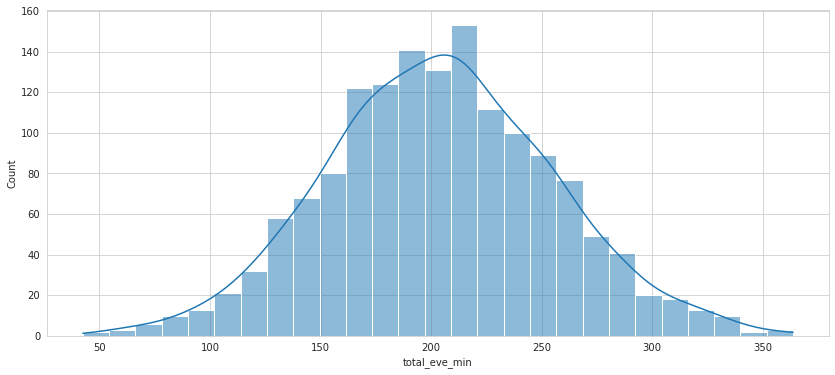

In [141]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_eve_min', kde=True)
plt.show()

In [142]:
test_df[test_df['total_eve_min'].isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
27,3349,126,445.0,no,no,0.0,314.85,99.0,54.62,NaN,93,14.27,193.6,106.0,8.71,8.0,4.0,2.16,1.0
112,3434,141,452.0,no,no,0.0,160.10,87.0,27.22,NaN,120,21.82,270.0,107.0,12.15,7.0,1.0,1.89,2.0


In [143]:
test_df['total_eve_min'] = test_df.sort_values(['total_eve_charge']).total_eve_min.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_eve_calls

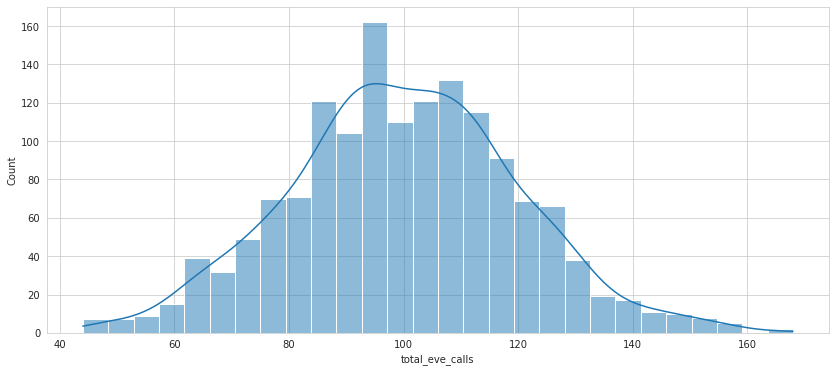

In [144]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_eve_calls', kde=True)
plt.show()

#### total_eve_charge

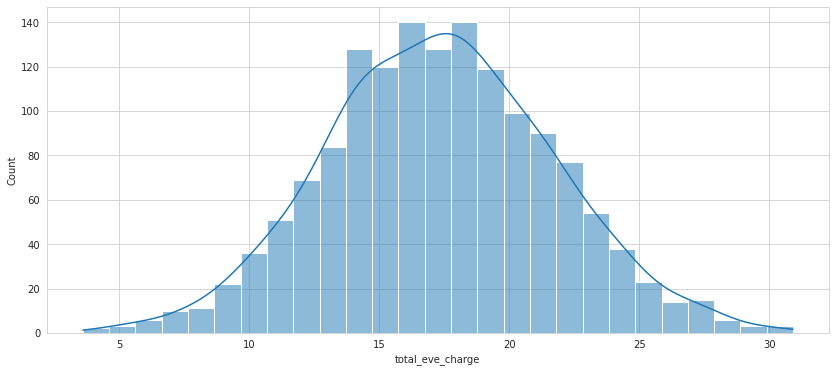

In [145]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_eve_charge', kde=True)
plt.show()

In [146]:
test_df[test_df['total_eve_charge'].isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
160,3482,21,452.0,no,no,0.0,146.0,78.0,24.810,109.7,79,NaN,247.4,108.0,11.13,6.8,7.0,1.84,0.0
516,3838,48,452.0,no,no,0.0,190.4,92.0,32.370,317.5,85,NaN,133.4,113.0,6.00,8.3,4.0,2.24,2.0
576,3898,108,445.0,no,yes,15.0,165.1,85.0,28.070,267.0,93,NaN,250.7,NaN,11.28,10.9,4.0,2.94,1.0
597,3919,95,445.0,no,no,0.0,238.1,65.0,40.480,187.2,98,NaN,190.0,115.0,8.55,NaN,4.0,3.19,NaN
828,4150,51,547.0,no,no,0.0,181.5,108.0,30.860,196.9,87,NaN,187.2,119.0,8.42,10.3,2.0,2.78,1.0
951,4273,154,452.0,no,no,0.0,191.4,102.0,32.540,205.4,119,NaN,205.7,121.0,9.26,10.2,3.0,2.75,3.0
1161,4483,75,547.0,no,yes,46.0,214.1,62.0,36.400,200.9,111,NaN,246.8,126.0,NaN,9.2,6.0,2.48,0.0
1380,4702,61,452.0,no,yes,15.0,252.4,106.0,42.925,187.8,69,NaN,259.6,137.0,11.68,10.0,3.0,2.70,2.0
1451,4773,80,452.0,no,no,0.0,113.2,86.0,19.240,185.5,97,NaN,237.3,145.0,10.68,9.5,5.0,2.57,1.0


In [147]:
test_df['total_eve_charge'] = test_df.sort_values(['total_eve_min']).total_eve_charge.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_night_minutes

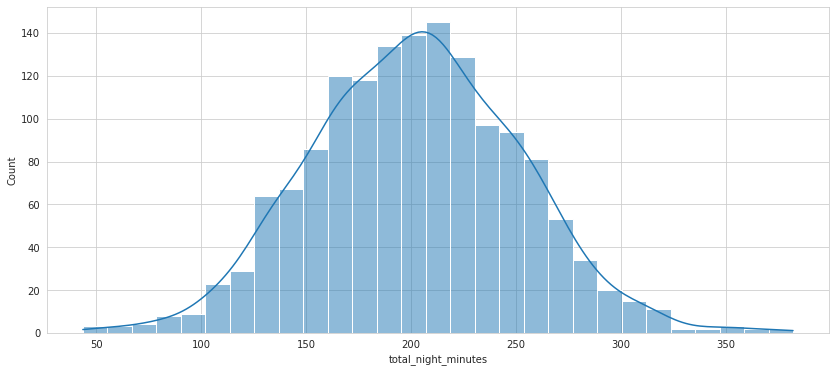

In [148]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_night_minutes', kde=True)
plt.show()

In [149]:
test_df[test_df['total_night_minutes'].isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
934,4256,130,547.0,no,no,0.0,139.1,72.0,23.65,246.0,112,20.91,NaN,121.0,9.32,11.4,NaN,3.08,5.0
1229,4551,110,547.0,no,no,0.0,208.0,69.0,35.36,95.1,94,8.08,NaN,129.0,8.03,8.0,11.0,2.16,1.0
1302,4624,54,452.0,no,no,0.0,238.5,82.0,44.08,213.4,88,19.16,NaN,131.0,10.99,10.2,3.0,2.75,2.0


In [150]:
test_df['total_night_minutes'] = test_df.sort_values(['total_night_charge']).total_night_minutes.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_night_calls

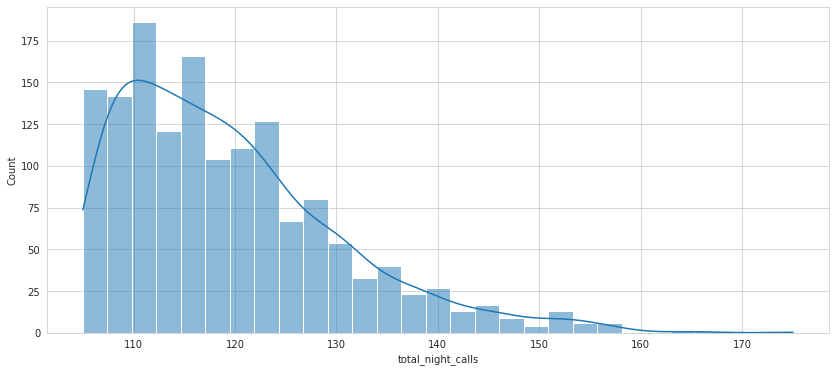

In [151]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_night_calls', kde=True)
plt.show()

In [152]:
test_df[(test_df['total_night_calls'].isnull()) | 
        (test_df['total_night_calls'] > 155)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
576,3898,108,445.0,no,yes,15.0,165.1,85.0,28.07,267.0,93,22.985,250.7,NaN,11.28,10.9,4.0,2.94,1.0
660,3982,158,547.0,no,no,0.0,155.9,123.0,26.50,224.2,112,19.060,221.0,NaN,9.95,8.6,8.0,2.32,2.0
1491,4813,127,547.0,no,yes,27.0,2.6,113.0,0.44,254.0,102,21.590,242.7,156.0,10.92,9.2,5.0,2.48,3.0
1492,4814,41,547.0,no,no,0.0,223.8,67.0,38.05,244.8,74,20.810,223.8,156.0,10.07,12.3,5.0,3.32,3.0
1493,4815,79,452.0,no,no,0.0,213.6,110.0,36.31,234.9,121,19.970,229.6,157.0,10.33,8.8,3.0,2.38,2.0
1494,4816,100,452.0,no,yes,25.0,215.9,90.0,36.70,257.9,92,21.920,180.2,157.0,8.11,11.6,4.0,3.13,1.0
1495,4817,23,547.0,no,no,0.0,321.6,107.0,54.67,251.6,115,21.390,141.1,158.0,6.35,11.3,3.0,3.05,2.0
1496,4818,23,547.0,no,no,0.0,334.6,107.0,52.67,261.6,121,21.390,127.1,158.0,6.35,11.3,2.0,3.05,2.0
1497,4819,103,452.0,no,no,0.0,70.9,134.0,12.05,134.5,112,11.430,168.8,164.0,7.60,12.0,6.0,3.24,2.0
1498,4820,34,452.0,no,no,0.0,193.7,74.0,32.93,126.9,84,10.790,221.2,166.0,9.95,8.8,4.0,2.38,0.0


In [153]:
test_df['total_night_calls'] = test_df.sort_values(['total_night_minutes']).total_night_calls.ffill().sort_index()

#### total_night_charge

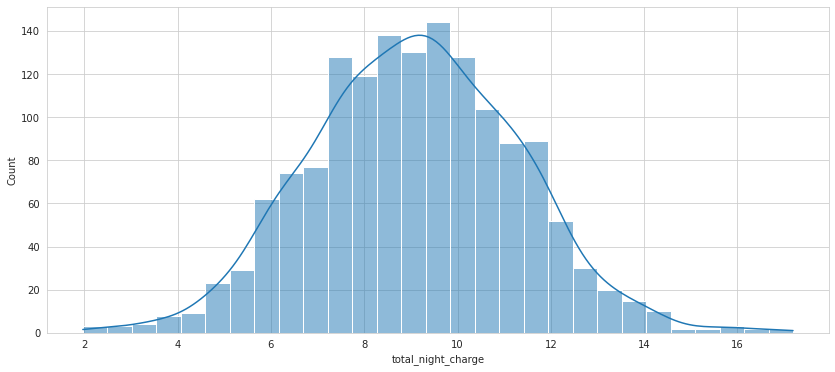

In [154]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_night_charge', kde=True)
plt.show()

In [155]:
test_df[test_df['total_night_charge'].isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
453,3775,139,547.0,yes,yes,31.0,203.5,82.0,34.6,200.3,72,17.030,214.0,112.0,NaN,NaN,6.0,3.62,1.0
1161,4483,75,547.0,no,yes,46.0,214.1,62.0,36.4,200.9,111,17.085,246.8,126.0,NaN,9.2,6.0,2.48,0.0


In [156]:
test_df['total_night_charge'] = test_df.sort_values(['total_night_minutes']).total_night_charge.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_intl_minutes

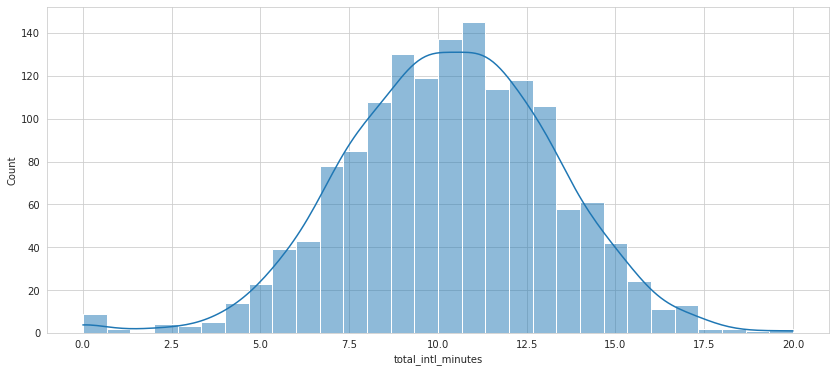

In [157]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_intl_minutes', kde=True)
plt.show()

In [158]:
test_df[(test_df['total_intl_minutes'].isnull()) | 
        (test_df['total_intl_minutes'] < 1) | 
        (test_df['total_intl_minutes'] > 18)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
116,3438,86,547.0,no,no,0.0,70.7,125.0,12.02,211.0,113,17.940,174.6,107.0,7.860,0.0,0.0,0.00,2.0
230,3552,87,445.0,no,yes,28.0,151.4,95.0,25.74,152.4,97,12.950,250.1,109.0,11.250,0.0,0.0,0.00,1.0
359,3681,128,445.0,no,no,0.0,125.2,99.0,21.28,205.4,107,17.460,254.4,111.0,11.450,18.9,2.0,5.10,0.0
421,3743,70,445.0,no,no,0.0,232.1,122.0,39.46,292.3,112,24.850,201.2,112.0,9.050,0.0,0.0,0.00,3.0
453,3775,139,547.0,yes,yes,31.0,203.5,82.0,34.60,200.3,72,17.030,214.0,112.0,9.855,NaN,6.0,3.62,1.0
581,3903,115,452.0,no,no,0.0,132.0,90.0,22.44,197.5,75,16.790,175.8,114.0,7.910,0.0,0.0,0.00,3.0
597,3919,95,445.0,no,no,0.0,238.1,65.0,40.48,187.2,98,15.905,190.0,115.0,8.550,NaN,4.0,3.19,NaN
687,4009,53,452.0,no,no,0.0,184.8,98.0,31.42,216.4,125,18.390,141.1,116.0,6.350,18.4,3.0,4.97,2.0
795,4117,114,452.0,no,no,0.0,191.5,88.0,32.56,175.2,78,14.890,220.3,118.0,9.910,0.0,0.0,0.00,0.0
955,4277,120,547.0,no,yes,27.0,128.5,115.0,21.85,163.7,91,13.910,242.9,121.0,10.930,0.0,0.0,0.00,1.0


In [159]:
test_df['total_intl_minutes'] = test_df.sort_values(['total_intl_charge']).total_intl_minutes.interpolate(method='linear', limit_direction='forward', axis=0).sort_index()

#### total_intl_calls

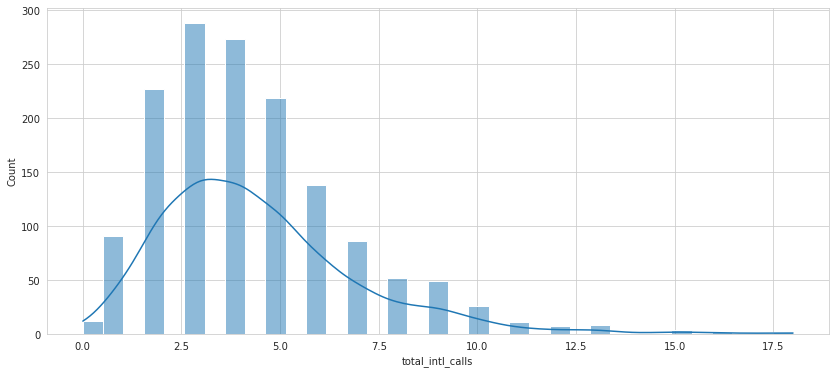

In [160]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_intl_calls', kde=True)
plt.show()

In [161]:
test_df[(test_df['total_intl_calls'] < 1) | 
        (test_df['total_intl_calls'] > 16)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
36,3358,79,445.0,no,no,0.0,205.7,123.0,34.97,214.5,108,18.23,226.1,106.0,10.17,6.7,18.0,1.81,1.0
116,3438,86,547.0,no,no,0.0,70.7,125.0,12.02,211.0,113,17.94,174.6,107.0,7.86,0.0,0.0,0.00,2.0
178,3500,84,452.0,no,yes,33.0,159.1,106.0,27.05,149.8,101,12.73,213.4,108.0,9.60,13.0,18.0,3.51,1.0
189,3511,94,452.0,no,no,0.0,190.4,91.0,32.37,92.0,107,7.82,224.8,108.0,10.12,13.6,17.0,3.67,2.0
230,3552,87,445.0,no,yes,28.0,151.4,95.0,25.74,152.4,97,12.95,250.1,109.0,11.25,0.0,0.0,0.00,1.0
421,3743,70,445.0,no,no,0.0,232.1,122.0,39.46,292.3,112,24.85,201.2,112.0,9.05,0.0,0.0,0.00,3.0
581,3903,115,452.0,no,no,0.0,132.0,90.0,22.44,197.5,75,16.79,175.8,114.0,7.91,0.0,0.0,0.00,3.0
755,4077,2,452.0,yes,no,0.0,117.1,44.0,20.46,127.9,92,12.81,198.6,117.0,8.67,9.1,0.0,2.46,2.0
795,4117,114,452.0,no,no,0.0,191.5,88.0,32.56,175.2,78,14.89,220.3,118.0,9.91,0.0,0.0,0.00,0.0
955,4277,120,547.0,no,yes,27.0,128.5,115.0,21.85,163.7,91,13.91,242.9,121.0,10.93,0.0,0.0,0.00,1.0


In [162]:
test_df.loc[(test_df['total_intl_minutes'] > 0) & 
            (test_df['total_intl_charge'] > 0) & 
            (test_df['total_intl_calls'] < 1), 'total_intl_calls'] = np.nan
test_df[test_df.total_intl_calls.isnull()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
63,3385,43,445.0,no,no,0.0,135.8,125.0,23.09,163.2,88,13.87,229.8,106.0,10.34,12.6,NaN,3.40,0.0
755,4077,2,452.0,yes,no,0.0,117.1,44.0,20.46,127.9,92,12.81,198.6,117.0,8.67,9.1,NaN,2.46,2.0
934,4256,130,547.0,no,no,0.0,139.1,72.0,23.65,246.0,112,20.91,207.2,121.0,9.32,11.4,NaN,3.08,5.0
1140,4462,161,547.0,yes,no,0.0,210.2,101.0,31.01,250.4,108,21.20,268.9,125.0,11.47,12.9,NaN,3.48,1.0
1436,4758,74,547.0,yes,no,0.0,125.8,103.0,21.39,207.7,96,17.65,207.4,143.0,9.33,14.1,NaN,3.81,1.0
1471,4793,147,452.0,yes,no,0.0,213.2,111.0,38.28,183.9,96,16.72,143.2,150.0,6.44,9.9,NaN,2.67,0.0


In [163]:
test_df['total_intl_calls'] = test_df.sort_values(['total_intl_minutes']).total_intl_calls.ffill().sort_index()

#### total_intl_charge

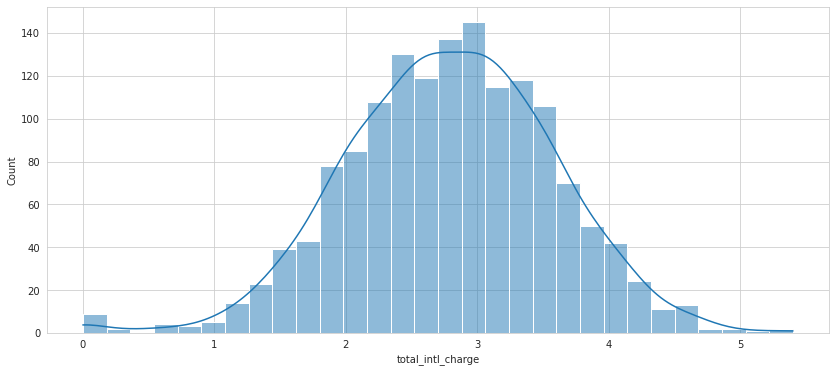

In [164]:
plt.figure(figsize=(14, 6))
sns.histplot(data=test_df, x='total_intl_charge', kde=True)
plt.show()

In [165]:
test_df[(test_df['total_intl_charge'] < 0.05) | 
        (test_df['total_intl_charge'] > 5)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
116,3438,86,547.0,no,no,0.0,70.7,125.0,12.02,211.0,113,17.94,174.6,107.0,7.86,0.0,0.0,0.0,2.0
230,3552,87,445.0,no,yes,28.0,151.4,95.0,25.74,152.4,97,12.95,250.1,109.0,11.25,0.0,0.0,0.0,1.0
359,3681,128,445.0,no,no,0.0,125.2,99.0,21.28,205.4,107,17.46,254.4,111.0,11.45,18.9,2.0,5.1,0.0
421,3743,70,445.0,no,no,0.0,232.1,122.0,39.46,292.3,112,24.85,201.2,112.0,9.05,0.0,0.0,0.0,3.0
581,3903,115,452.0,no,no,0.0,132.0,90.0,22.44,197.5,75,16.79,175.8,114.0,7.91,0.0,0.0,0.0,3.0
795,4117,114,452.0,no,no,0.0,191.5,88.0,32.56,175.2,78,14.89,220.3,118.0,9.91,0.0,0.0,0.0,0.0
955,4277,120,547.0,no,yes,27.0,128.5,115.0,21.85,163.7,91,13.91,242.9,121.0,10.93,0.0,0.0,0.0,1.0
987,4309,70,452.0,no,no,0.0,222.8,114.0,37.88,215.9,113,18.35,223.5,122.0,10.06,0.0,0.0,0.0,1.0
1152,4474,36,547.0,yes,yes,42.0,196.8,89.0,33.46,254.9,122,21.67,138.3,126.0,6.22,20.0,6.0,5.4,0.0
1167,4489,165,547.0,no,no,0.0,242.9,126.0,41.29,209.8,65,17.83,228.4,126.0,10.28,0.0,0.0,0.0,1.0


#### customer_service_calls

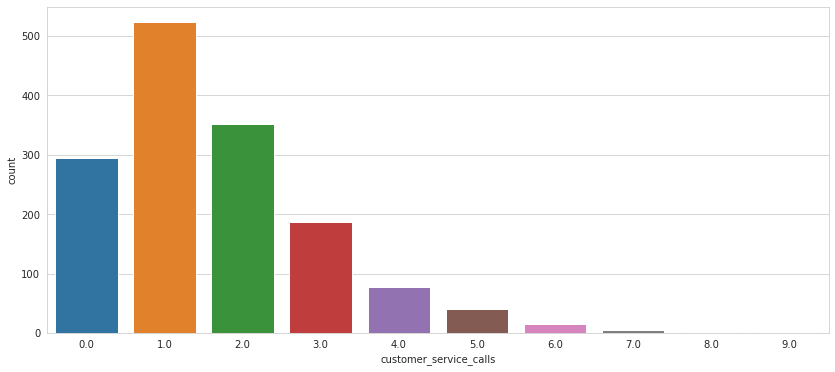

In [166]:
plt.figure(figsize=(14, 6))
sns.countplot(data=test_df, x='customer_service_calls')
plt.show()

In [167]:
test_df['customer_service_calls'].fillna(1, inplace=True)

In [168]:
test_df.isnull().sum()

customer_id               0
account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
dtype: int64

In [169]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,1500.0,4071.500000,433.157015,3322.00,3696.750,4071.500,4446.250,4821.00
account_length,1500.0,101.042000,39.454167,1.00,73.000,100.000,127.250,243.00
location_code,1500.0,475.472667,43.018356,445.00,452.000,452.000,547.000,547.00
number_vm_messages,1500.0,7.800667,13.373413,0.00,0.000,0.000,18.000,50.00
total_day_min,1500.0,184.526100,57.047357,2.60,144.600,184.100,222.125,345.30
total_day_calls,1500.0,100.240000,19.987781,30.00,87.000,100.000,113.000,157.00
total_day_charge,1500.0,31.399730,9.704459,0.44,24.650,31.300,37.880,59.36
total_eve_min,1500.0,203.990200,51.529195,42.50,168.300,203.850,238.200,363.70
total_eve_calls,1500.0,100.034000,19.994950,44.00,87.000,100.000,113.000,168.00
total_eve_charge,1500.0,17.322973,4.368627,3.61,14.270,17.330,20.205,30.91


In [170]:
test_df

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,3322,91,445.0,yes,no,0.0,258.4,112.0,42.89,190.0,93,14.47,158.6,105.0,7.09,12.1,3.0,3.27,2.0
1,3323,113,445.0,no,yes,20.0,155.8,81.0,28.83,168.5,62,13.73,275.5,105.0,12.22,8.7,3.0,2.35,5.0
2,3324,122,445.0,no,no,0.0,237.2,137.0,40.30,263.8,134,22.76,251.3,105.0,10.81,8.8,4.0,2.38,1.0
3,3325,103,445.0,no,no,0.0,133.6,117.0,23.60,156.1,130,13.37,207.2,105.0,9.95,10.4,7.0,2.81,8.0
4,3326,111,452.0,no,no,0.0,115.6,120.0,24.54,211.1,66,18.79,140.9,105.0,5.76,12.7,1.0,3.43,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4817,23,547.0,no,no,0.0,321.6,107.0,54.67,251.6,115,21.39,141.1,158.0,6.35,11.3,3.0,3.05,2.0
1496,4818,23,547.0,no,no,0.0,334.6,107.0,52.67,261.6,121,21.39,127.1,158.0,6.35,11.3,2.0,3.05,2.0
1497,4819,103,452.0,no,no,0.0,70.9,134.0,12.05,134.5,112,11.43,168.8,164.0,7.60,12.0,6.0,3.24,2.0
1498,4820,34,452.0,no,no,0.0,193.7,74.0,32.93,126.9,84,10.79,221.2,166.0,9.95,8.8,4.0,2.38,0.0


In [171]:
test_df.to_csv(cleaned_test_path, index=False)